In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
# import tensorflow as tf
from six.moves import cPickle as pickle
import pickle
import os
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

In [3]:
cd Data/HumanRobot/


/home/ares/Dropbox/Phd/AdaFT/Data/HumanRobot


In [4]:
ls

action_trace_q_learning    taaf_v1_ada.csv         u_all_on.csv
action_trace_q_learning~   taaf_v1_all_on.csv      xs_v1_ada.csv
copies_v1_ada.csv          taaf_v2_ada6.csv        xs_v1_all_on.csv
copies_v1_all_on.csv       taaf_v2_ada.csv         xs_v2_ada6.csv
copies_v2_ada6.csv         taaf_v2_all_on.csv      xs_v2_ada.csv
copies_v2_ada.csv          taaf_vmix_ada6.csv      xs_v2_all_on.csv
copies_v2_all_on.csv       taaf_vmix_ada.csv       xs_vmix_ada6.csv
copies_vmix_ada6.csv       taaf_vmix_ada_dvfs.csv  xs_vmix_ada.csv
copies_vmix_ada.csv        taaf_vmix_ada_rf1.csv   xs_vmix_ada_dvfs.csv
copies_vmix_ada_dvfs.csv   taaf_vmix_ada_rf.csv    xs_vmix_ada_rf1.csv
copies_vmix_ada_rf1.csv    taaf_vmix_all_on.csv    xs_vmix_ada_rf.csv
copies_vmix_ada_rf.csv     temp_v1_ada.csv         xs_vmix_all_on.csv
copies_vmix_all_on.csv     temp_v1_all_on.csv      xtrack_v1_ada.csv
hardware_provisioning.csv  temp_v2_ada6.csv        xtrack_v1_all_on.csv
labelded_sss_robot.csv     temp_v2_ada.csv   

In [4]:
taaf_v1_ada = pd.read_csv('taaf_v1_ada.csv')
taaf_v1_all_on = pd.read_csv('taaf_v1_all_on.csv')
taaf_v2_ada = pd.read_csv('taaf_v2_ada.csv')
taaf_v2_all_on = pd.read_csv('taaf_v2_all_on.csv')
taaf_vmix_ada = pd.read_csv('taaf_vmix_ada.csv')
taaf_vmix_all_on = pd.read_csv('taaf_vmix_all_on.csv')
taaf_vmix_ada_dvfs = pd.read_csv('taaf_vmix_ada_dvfs.csv')
taaf_vmix_ada_rf = pd.read_csv('taaf_vmix_ada_rf.csv')

temp_v1_ada = pd.read_csv('temp_v1_ada.csv')
temp_v1_all_on = pd.read_csv('temp_v1_all_on.csv')
temp_v2_ada = pd.read_csv('temp_v2_ada.csv')
temp_v2_all_on = pd.read_csv('temp_v2_all_on.csv')
temp_vmix_ada = pd.read_csv('temp_vmix_ada.csv')
temp_vmix_all_on = pd.read_csv('temp_vmix_all_on.csv')
temp_vmix_ada_dvfs = pd.read_csv('temp_vmix_ada_dvfs.csv')

xs_v1_ada = pd.read_csv('xs_v1_ada.csv')
xs_v1_all_on = pd.read_csv('xs_v1_all_on.csv')
xs_v2_ada = pd.read_csv('xs_v2_ada.csv')
xs_v2_all_on = pd.read_csv('xs_v2_all_on.csv')
xs_vmix_ada = pd.read_csv('xs_vmix_ada.csv')
xs_vmix_all_on = pd.read_csv('xs_vmix_all_on.csv')
xs_vmix_ada_dvfs = pd.read_csv('xs_vmix_ada_dvfs.csv')
xs_vmix_ada_rf = pd.read_csv('xs_vmix_ada_rf.csv')

xtract_v1_ada = pd.read_csv('xtrack_v1_ada.csv')
xtrack_v1_all_on = pd.read_csv('xtrack_v1_all_on.csv')
xtrack_v2_ada = pd.read_csv('xtrack_v2_ada.csv')
xtrack_v2_all_on = pd.read_csv('xtrack_v2_all_on.csv')
xtrack_vmix_ada = pd.read_csv('xtrack_vmix_ada.csv')
xtrack_vmix_all_on = pd.read_csv('xtrack_vmix_all_on.csv')
xtrack_vmix_ada_dvfs = pd.read_csv('xtrack_vmix_ada_dvfs.csv')
xtrack_vmix_ada_rf = pd.read_csv('xtrack_vmix_ada_rf.csv')

copies_v1_ada = pd.read_csv('copies_v1_ada.csv')
copies_v1_all_on = pd.read_csv('copies_v1_all_on.csv')
copies_v2_ada = pd.read_csv('copies_v2_ada.csv')
copies_v2_all_on = pd.read_csv('copies_v2_all_on.csv')
copies_vmix_ada = pd.read_csv('copies_vmix_ada.csv')
copies_vmix_all_on = pd.read_csv('copies_vmix_all_on.csv')
copies_vmix_ada_dvfs = pd.read_csv('copies_vmix_ada_dvfs.csv')

hardware = pd.read_csv('hardware_provisioning.csv')

In [123]:
xtract_v1_ada = np.genfromtxt('xtrack_v1_ada.csv', delimiter=',')
xtract_v2_ada = np.genfromtxt('xtrack_v2_ada.csv', delimiter=',')
xtract_vmix_ada = np.genfromtxt('xtrack_vmix_ada.csv', delimiter=',')
xs_v1_ada = np.genfromtxt('xs_v1_ada.csv', delimiter=',')
xs_v2_ada = np.genfromtxt('xs_v2_ada.csv', delimiter=',')
xs_vmix_ada = np.genfromtxt('xs_vmix_ada.csv', delimiter=',')
xs_vmix_ada_dvfs = np.genfromtxt('xs_vmix_ada_dvfs.csv', delimiter=',')
xtrack_vmix_ada_dvfs = np.genfromtxt('xtrack_vmix_ada_dvfs.csv', delimiter=',')

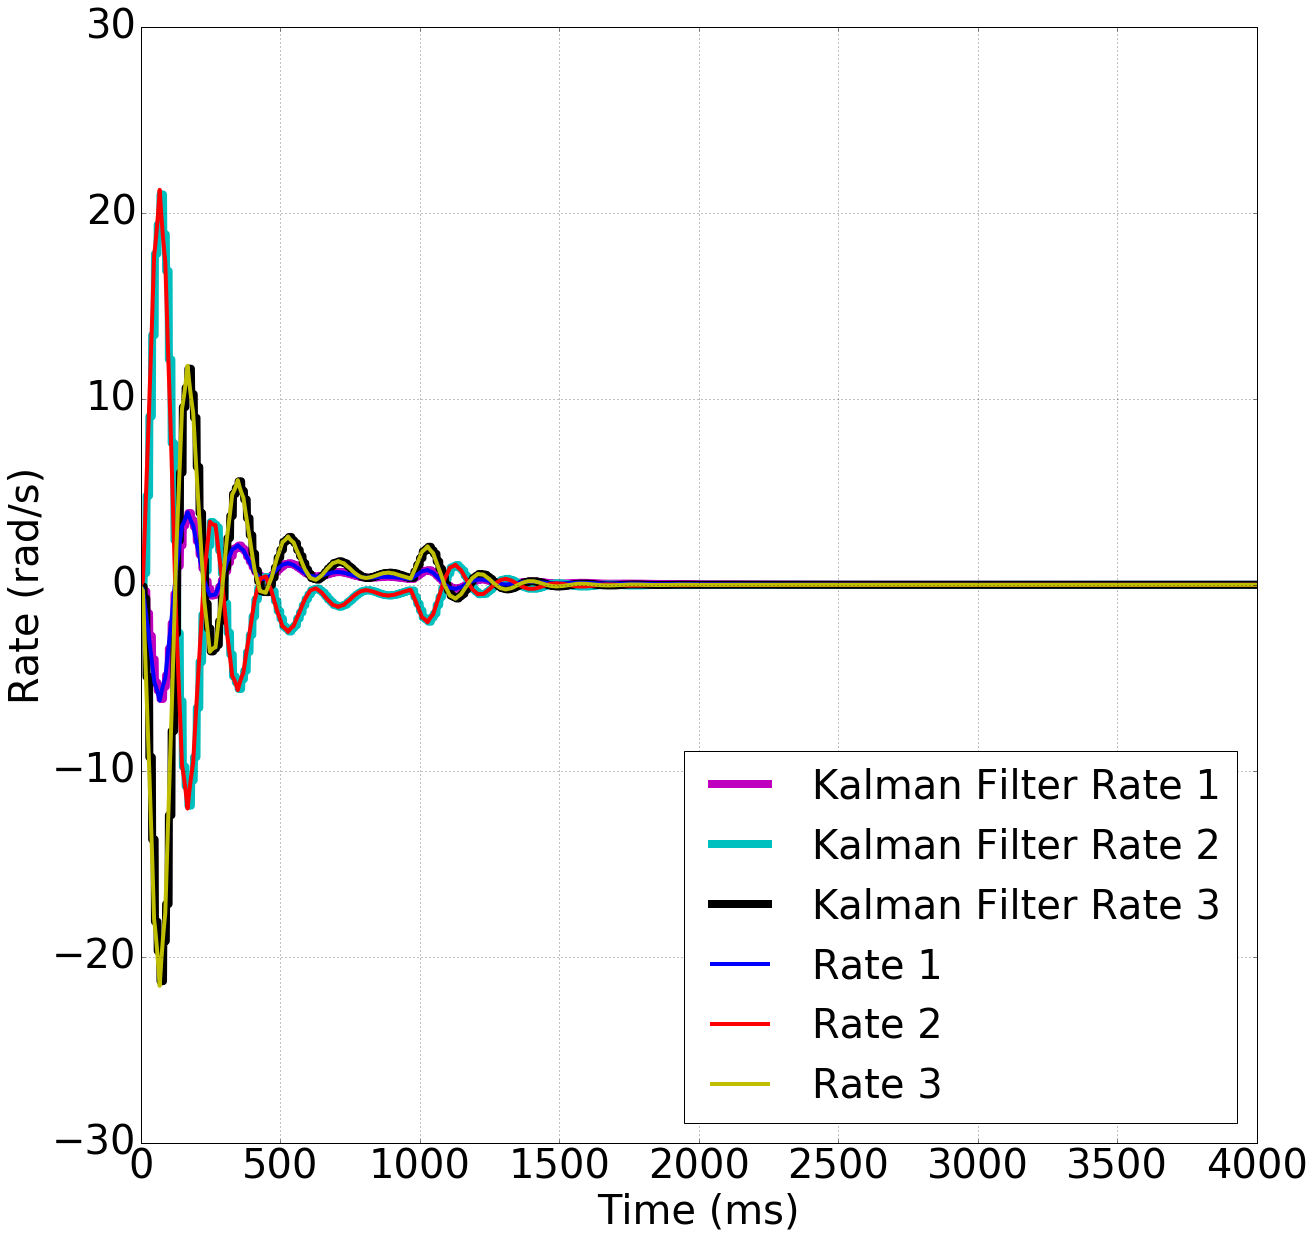

In [126]:
plt.figure(figsize=(20, 20))
plt.hold(True)
plt.grid(True)
plt.plot(xtrack_vmix_ada_dvfs[3, :4000], c = 'm', label='Kalman Filter Rate 1', linewidth=8)
plt.plot(xtrack_vmix_ada_dvfs[4, :4000], c = 'c', label='Kalman Filter Rate 2', linewidth=8)
plt.plot(xtrack_vmix_ada_dvfs[5, :4000], c = 'black', label='Kalman Filter Rate 3', linewidth=8)
plt.plot(xs_vmix_ada_dvfs[3, :4000], c = 'b', label='Rate 1', linewidth=4)
plt.plot(xs_vmix_ada_dvfs[4, :4000], c = 'r', label='Rate 2', linewidth = 4)
plt.plot(xs_vmix_ada_dvfs[5, :4000], c = 'y', label='Rate 3', linewidth = 4)
plt.xlabel('Time (ms)', fontsize=40)
plt.ylabel('Rate (rad/s)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc=4, fontsize=40)

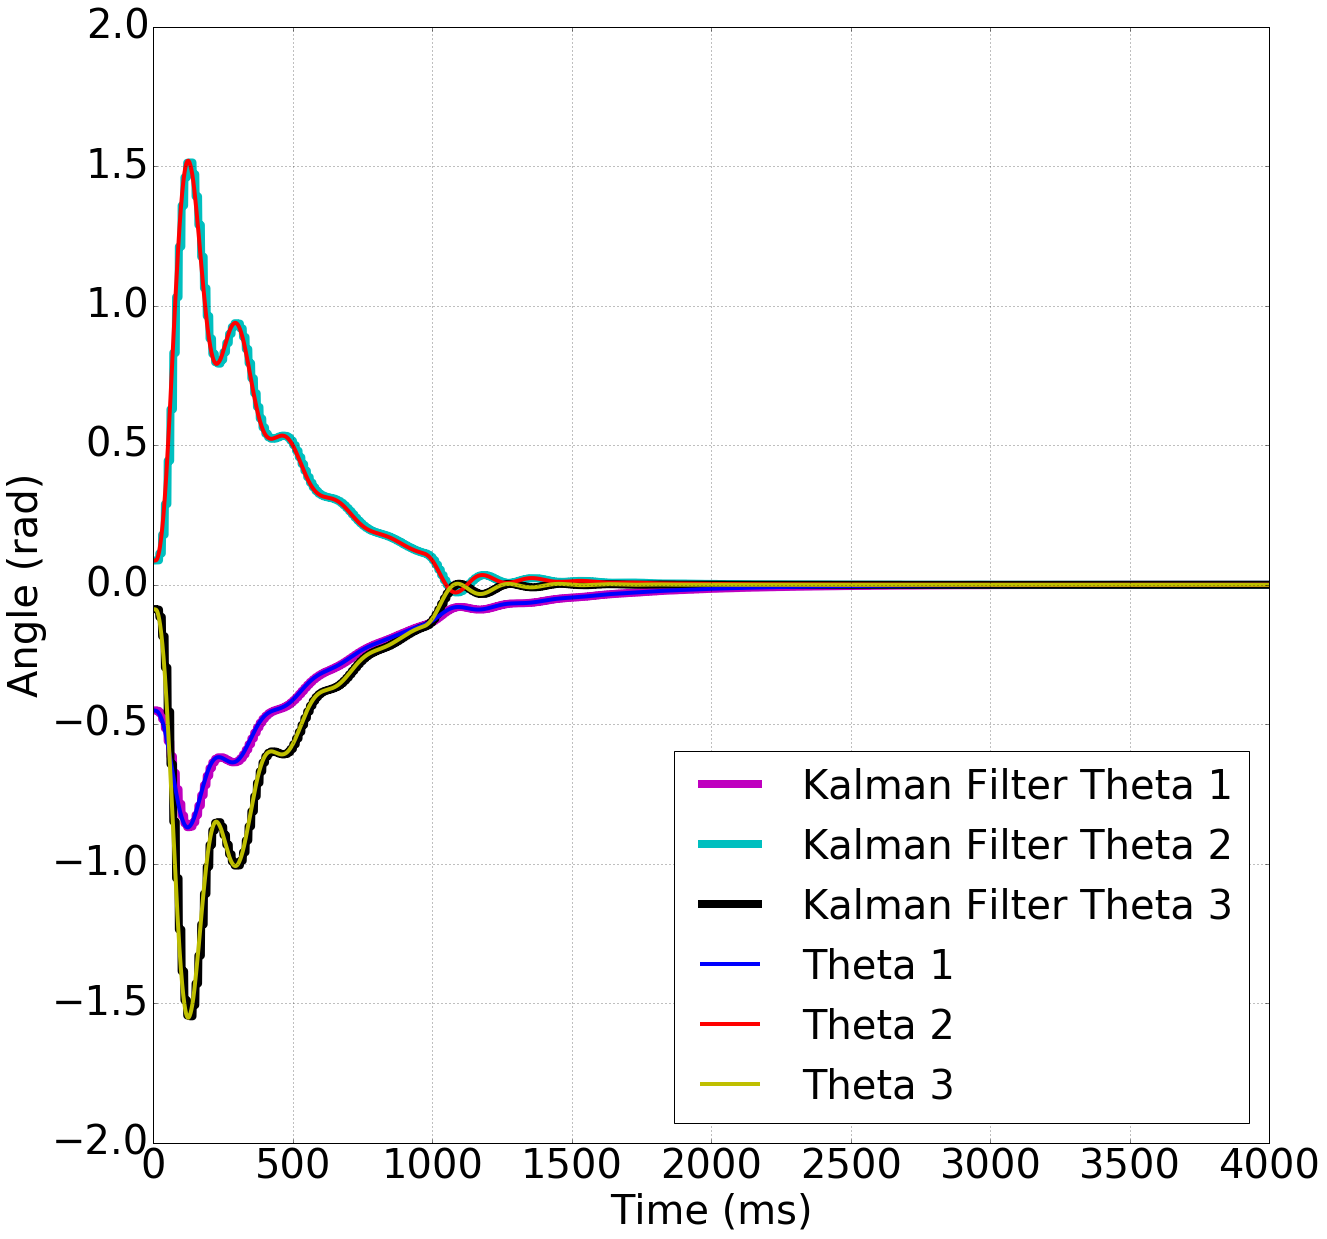

In [124]:
plt.figure(figsize=(20, 20))
plt.hold(True)
plt.grid(True)
plt.plot(xtrack_vmix_ada_dvfs[0, :4000], c = 'm', label='Kalman Filter Theta 1', linewidth=8)
plt.plot(xtrack_vmix_ada_dvfs[1, :4000], c = 'c', label='Kalman Filter Theta 2', linewidth=8)
plt.plot(xtrack_vmix_ada_dvfs[2, :4000], c = 'black', label='Kalman Filter Theta 3', linewidth=8)
plt.plot(xs_vmix_ada_dvfs[0, :4000], c = 'b', label='Theta 1', linewidth=4)
plt.plot(xs_vmix_ada_dvfs[1, :4000], c = 'r', label='Theta 2', linewidth = 4)
plt.plot(xs_vmix_ada_dvfs[2, :4000], c = 'y', label='Theta 3', linewidth = 4)
plt.xlabel('Time (ms)', fontsize=40)
plt.ylabel('Angle (rad)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc=4, fontsize=40)

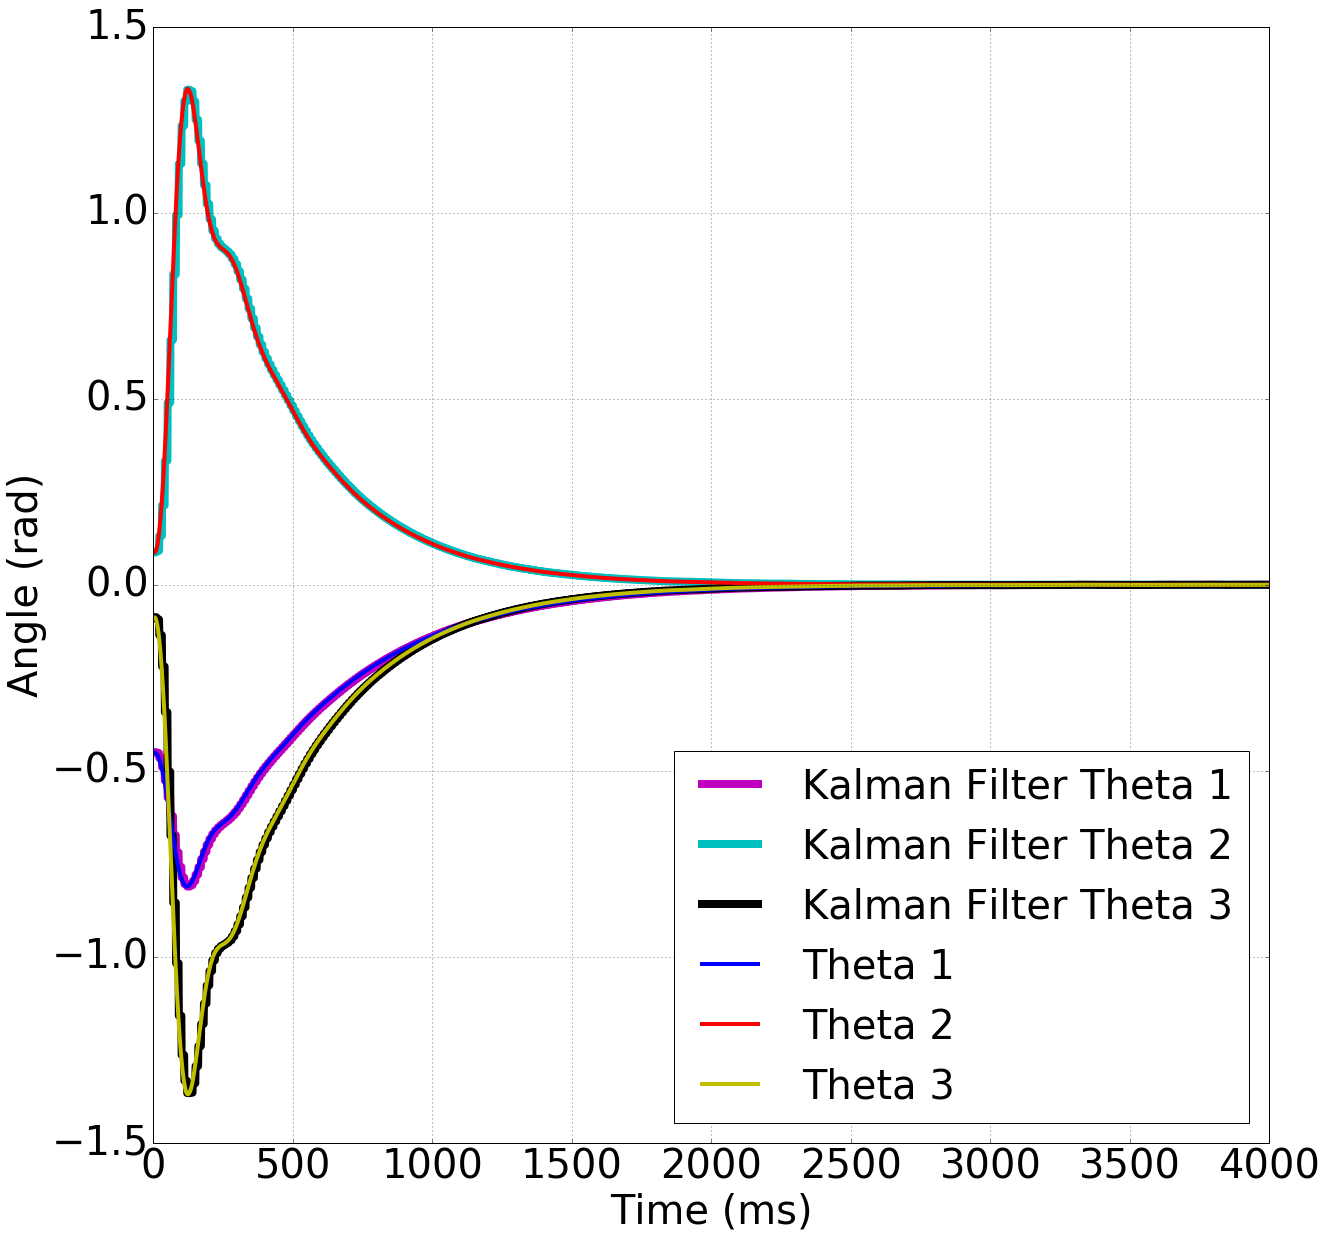

In [117]:
plt.figure(figsize=(20, 20))
plt.hold(True)
plt.grid(True)
plt.plot(xtract_v1_ada[0, :4000], c = 'm', label='Kalman Filter Theta 1', linewidth=8)
plt.plot(xtract_v1_ada[1, :4000], c = 'c', label='Kalman Filter Theta 2', linewidth=8)
plt.plot(xtract_v1_ada[2, :4000], c = 'black', label='Kalman Filter Theta 3', linewidth=8)
plt.plot(xs_v1_ada[0, :4000], c = 'b', label='Theta 1', linewidth=4)
plt.plot(xs_v1_ada[1, :4000], c = 'r', label='Theta 2', linewidth = 4)
plt.plot(xs_v1_ada[2, :4000], c = 'y', label='Theta 3', linewidth = 4)
plt.xlabel('Time (ms)', fontsize=40)
plt.ylabel('Angle (rad)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc=4, fontsize=40)

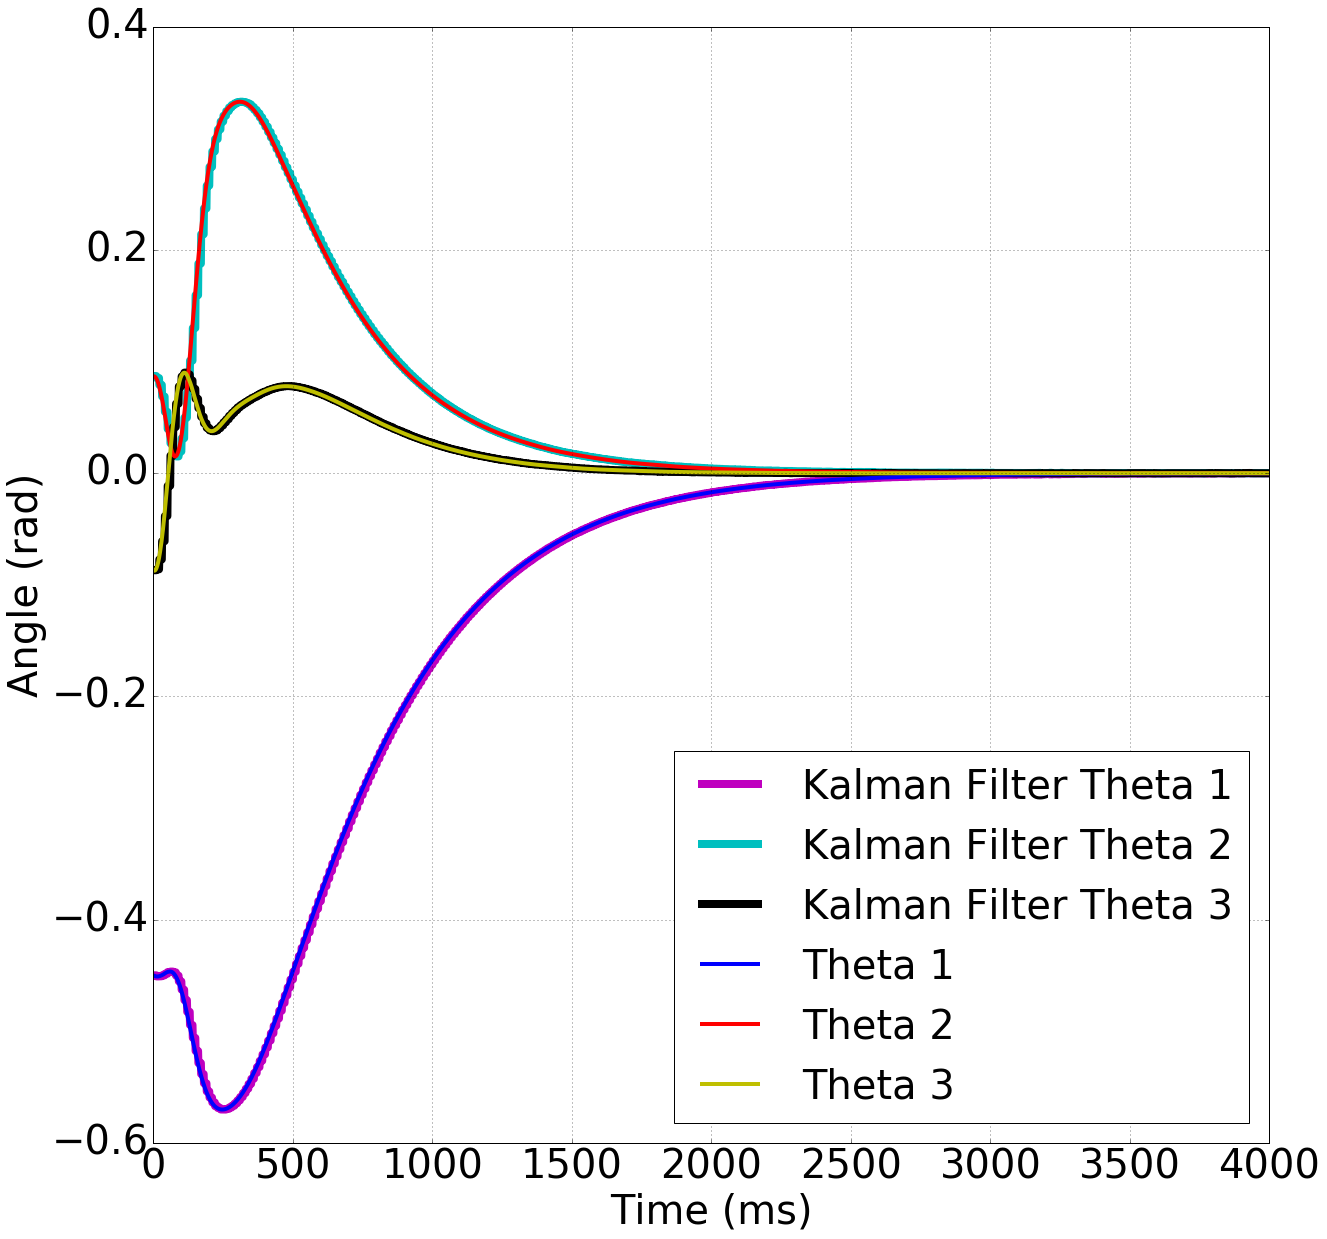

In [119]:
plt.figure(figsize=(20, 20))
plt.hold(True)
plt.grid(True)
plt.plot(xtract_v2_ada[0, :4000], c = 'm', label='Kalman Filter Theta 1', linewidth=8)
plt.plot(xtract_v2_ada[1, :4000], c = 'c', label='Kalman Filter Theta 2', linewidth=8)
plt.plot(xtract_v2_ada[2, :4000], c = 'black', label='Kalman Filter Theta 3', linewidth=8)
plt.plot(xs_v2_ada[0, :4000], c = 'b', label='Theta 1', linewidth=4)
plt.plot(xs_v2_ada[1, :4000], c = 'r', label='Theta 2', linewidth = 4)
plt.plot(xs_v2_ada[2, :4000], c = 'y', label='Theta 3', linewidth = 4)
plt.xlabel('Time (ms)', fontsize=40)
plt.ylabel('Angle (rad)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc=4, fontsize=40)

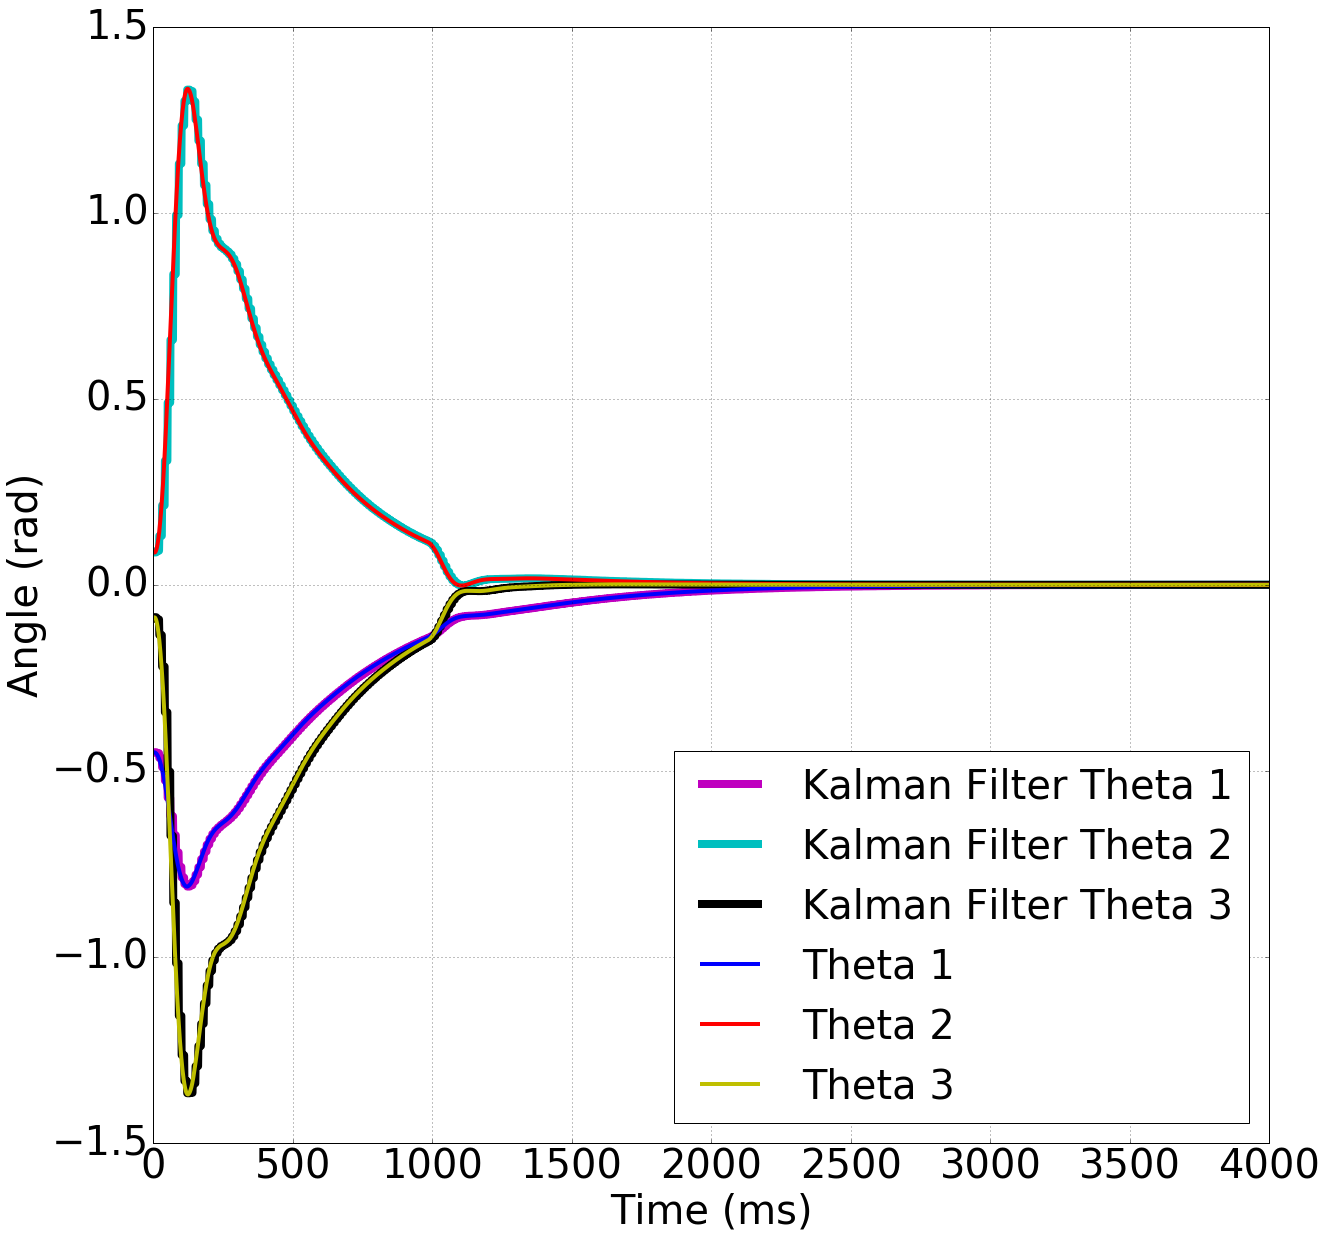

In [122]:
plt.figure(figsize=(20, 20))
plt.hold(True)
plt.grid(True)
plt.plot(xtract_vmix_ada[0, :4000], c = 'm', label='Kalman Filter Theta 1', linewidth=8)
plt.plot(xtract_vmix_ada[1, :4000], c = 'c', label='Kalman Filter Theta 2', linewidth=8)
plt.plot(xtract_vmix_ada[2, :4000], c = 'black', label='Kalman Filter Theta 3', linewidth=8)
plt.plot(xs_vmix_ada[0, :4000], c = 'b', label='Theta 1', linewidth=4)
plt.plot(xs_vmix_ada[1, :4000], c = 'r', label='Theta 2', linewidth = 4)
plt.plot(xs_vmix_ada[2, :4000], c = 'y', label='Theta 3', linewidth = 4)
plt.xlabel('Time (ms)', fontsize=40)
plt.ylabel('Angle (rad)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc=4, fontsize=40)

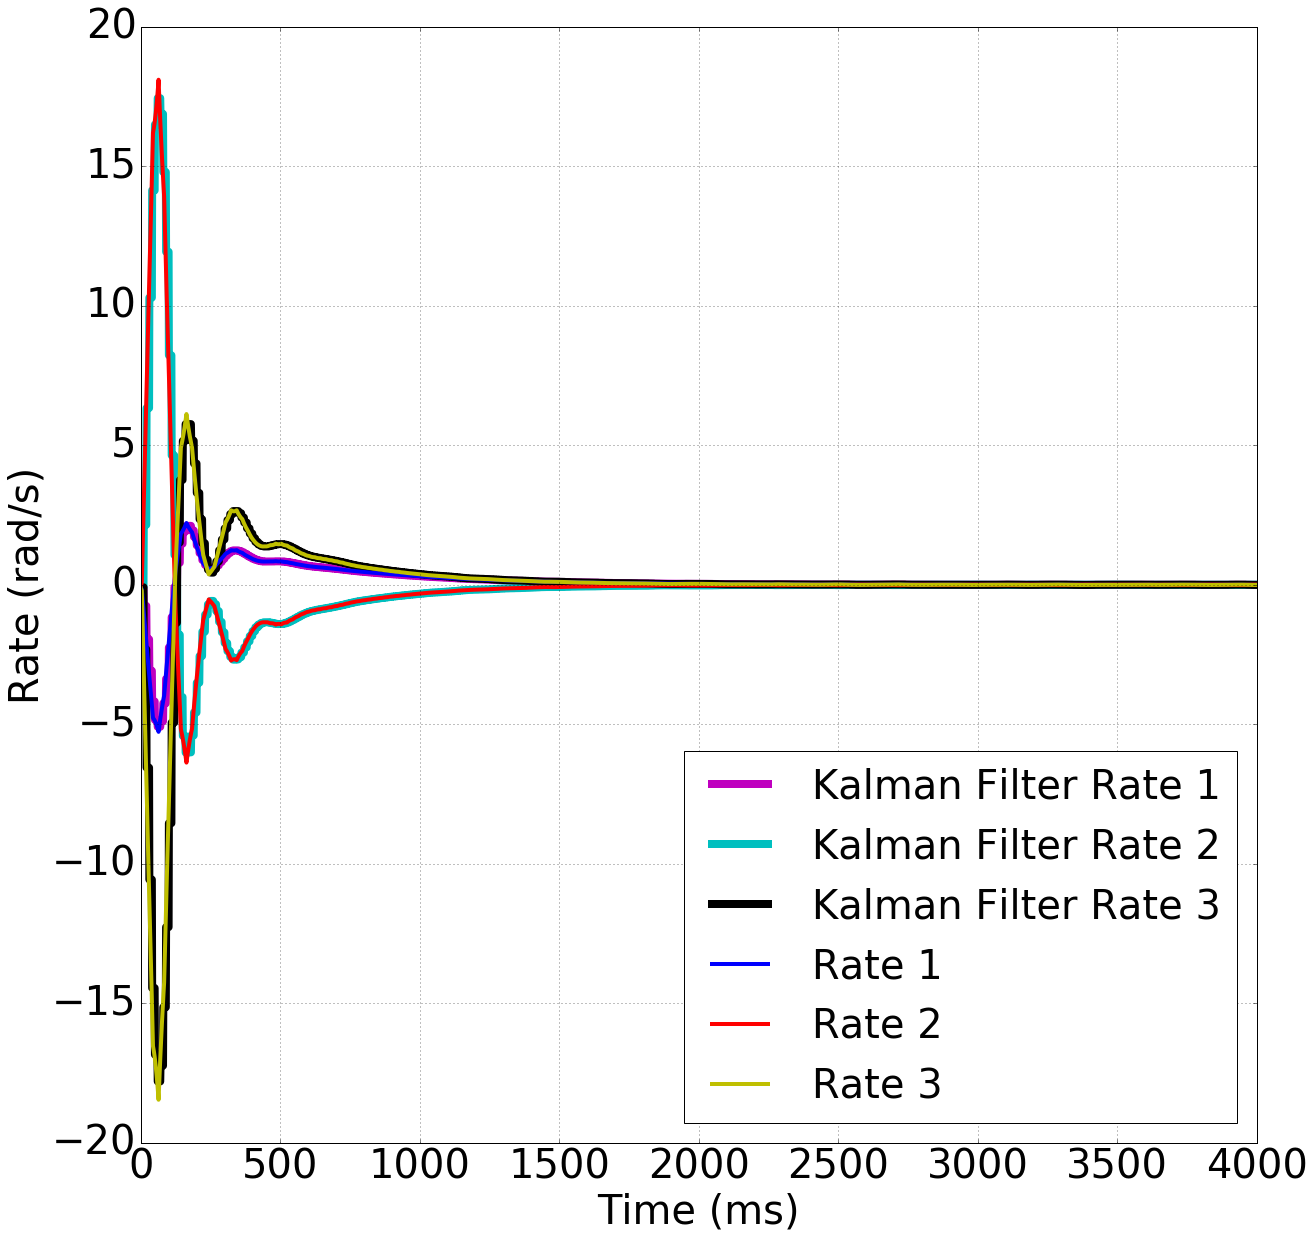

In [118]:
plt.figure(figsize=(20, 20))
plt.hold(True)
plt.grid(True)
plt.plot(xtract_v1_ada[3, :4000], c = 'm', label='Kalman Filter Rate 1', linewidth=8)
plt.plot(xtract_v1_ada[4, :4000], c = 'c', label='Kalman Filter Rate 2', linewidth=8)
plt.plot(xtract_v1_ada[5, :4000], c = 'black', label='Kalman Filter Rate 3', linewidth=8)
plt.plot(xs_v1_ada[3, :4000], c = 'b', label='Rate 1', linewidth=4)
plt.plot(xs_v1_ada[4, :4000], c = 'r', label='Rate 2', linewidth = 4)
plt.plot(xs_v1_ada[5, :4000], c = 'y', label='Rate 3', linewidth = 4)
plt.xlabel('Time (ms)', fontsize=40)
plt.ylabel('Rate (rad/s)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc=4, fontsize=40)

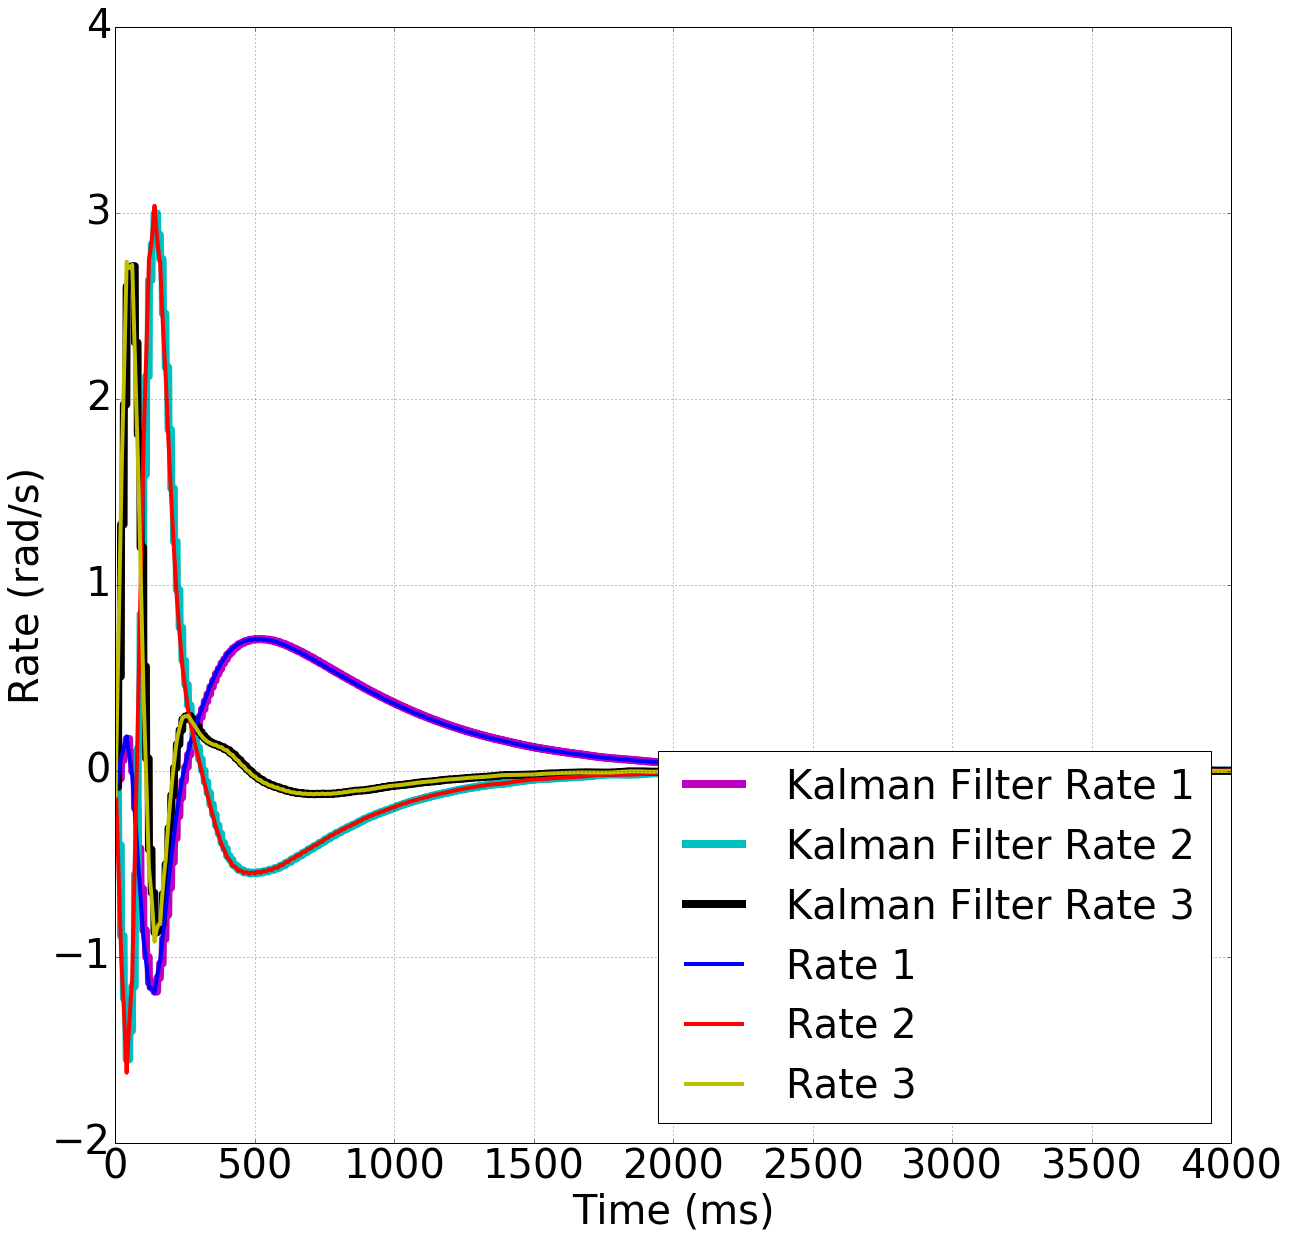

In [120]:
plt.figure(figsize=(20, 20))
plt.hold(True)
plt.grid(True)
plt.plot(xtract_v2_ada[3, :4000], c = 'm', label='Kalman Filter Rate 1', linewidth=8)
plt.plot(xtract_v2_ada[4, :4000], c = 'c', label='Kalman Filter Rate 2', linewidth=8)
plt.plot(xtract_v2_ada[5, :4000], c = 'black', label='Kalman Filter Rate 3', linewidth=8)
plt.plot(xs_v2_ada[3, :4000], c = 'b', label='Rate 1', linewidth=4)
plt.plot(xs_v2_ada[4, :4000], c = 'r', label='Rate 2', linewidth = 4)
plt.plot(xs_v2_ada[5, :4000], c = 'y', label='Rate 3', linewidth = 4)
plt.xlabel('Time (ms)', fontsize=40)
plt.ylabel('Rate (rad/s)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc=4, fontsize=40)

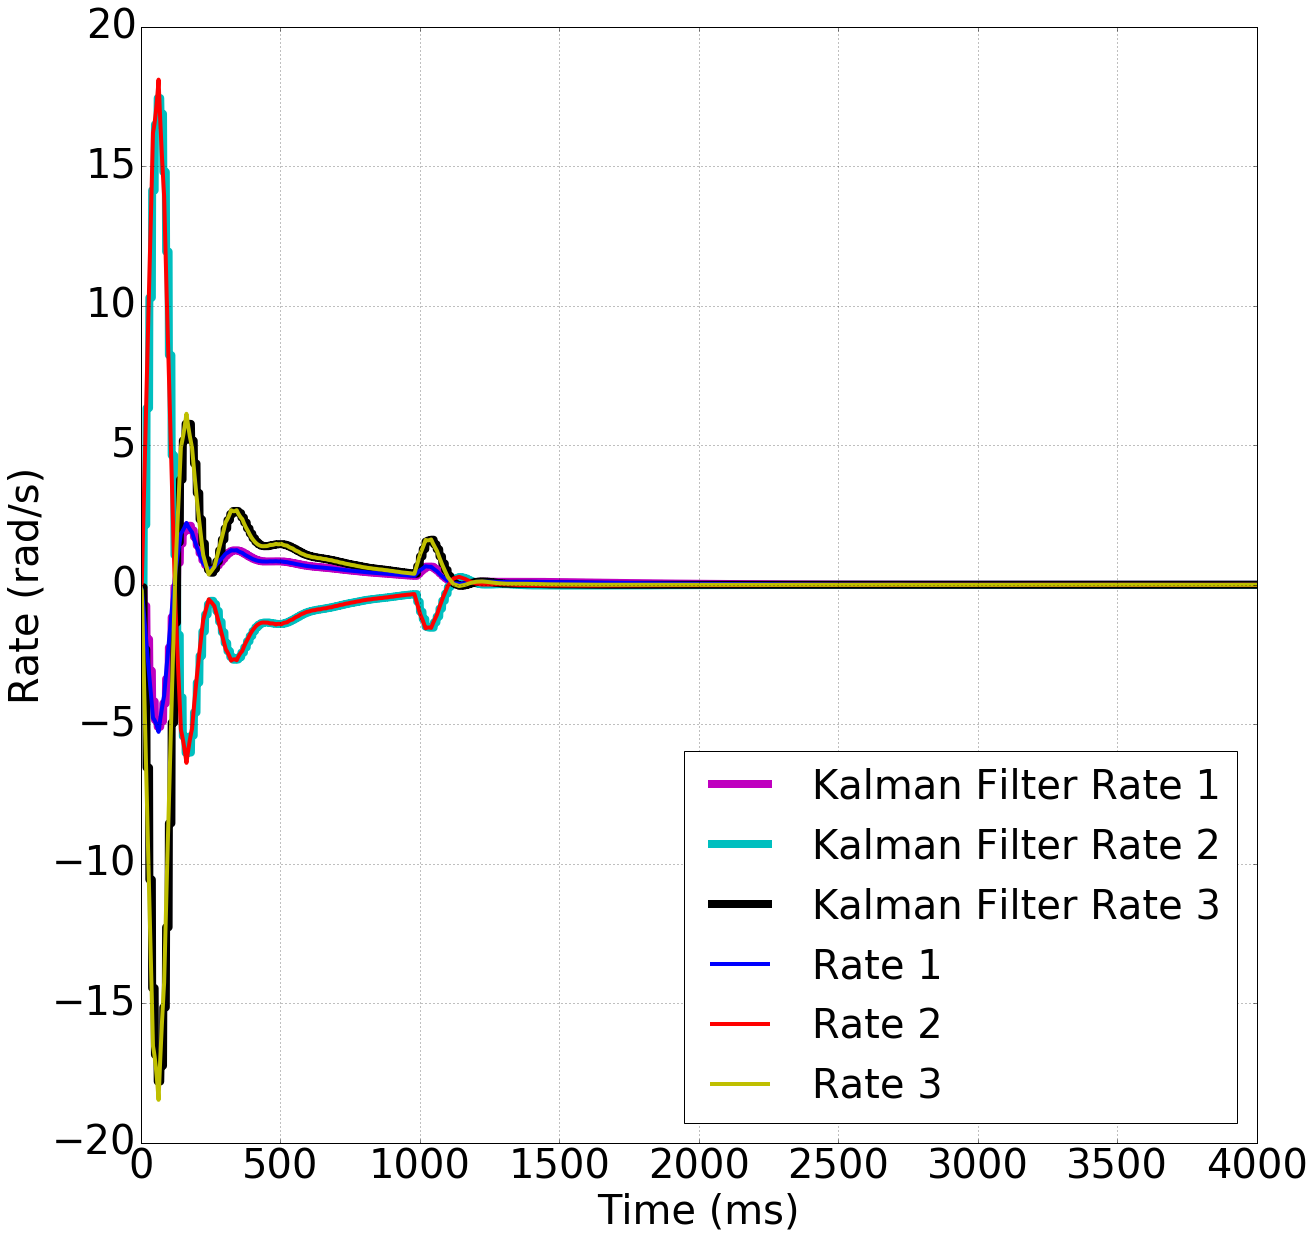

In [121]:
plt.figure(figsize=(20, 20))
plt.hold(True)
plt.grid(True)
plt.plot(xtract_vmix_ada[3, :4000], c = 'm', label='Kalman Filter Rate 1', linewidth=8)
plt.plot(xtract_vmix_ada[4, :4000], c = 'c', label='Kalman Filter Rate 2', linewidth=8)
plt.plot(xtract_vmix_ada[5, :4000], c = 'black', label='Kalman Filter Rate 3', linewidth=8)
plt.plot(xs_vmix_ada[3, :4000], c = 'b', label='Rate 1', linewidth=4)
plt.plot(xs_vmix_ada[4, :4000], c = 'r', label='Rate 2', linewidth = 4)
plt.plot(xs_vmix_ada[5, :4000], c = 'y', label='Rate 3', linewidth = 4)
plt.xlabel('Time (ms)', fontsize=40)
plt.ylabel('Rate (rad/s)', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(loc=4, fontsize=40)

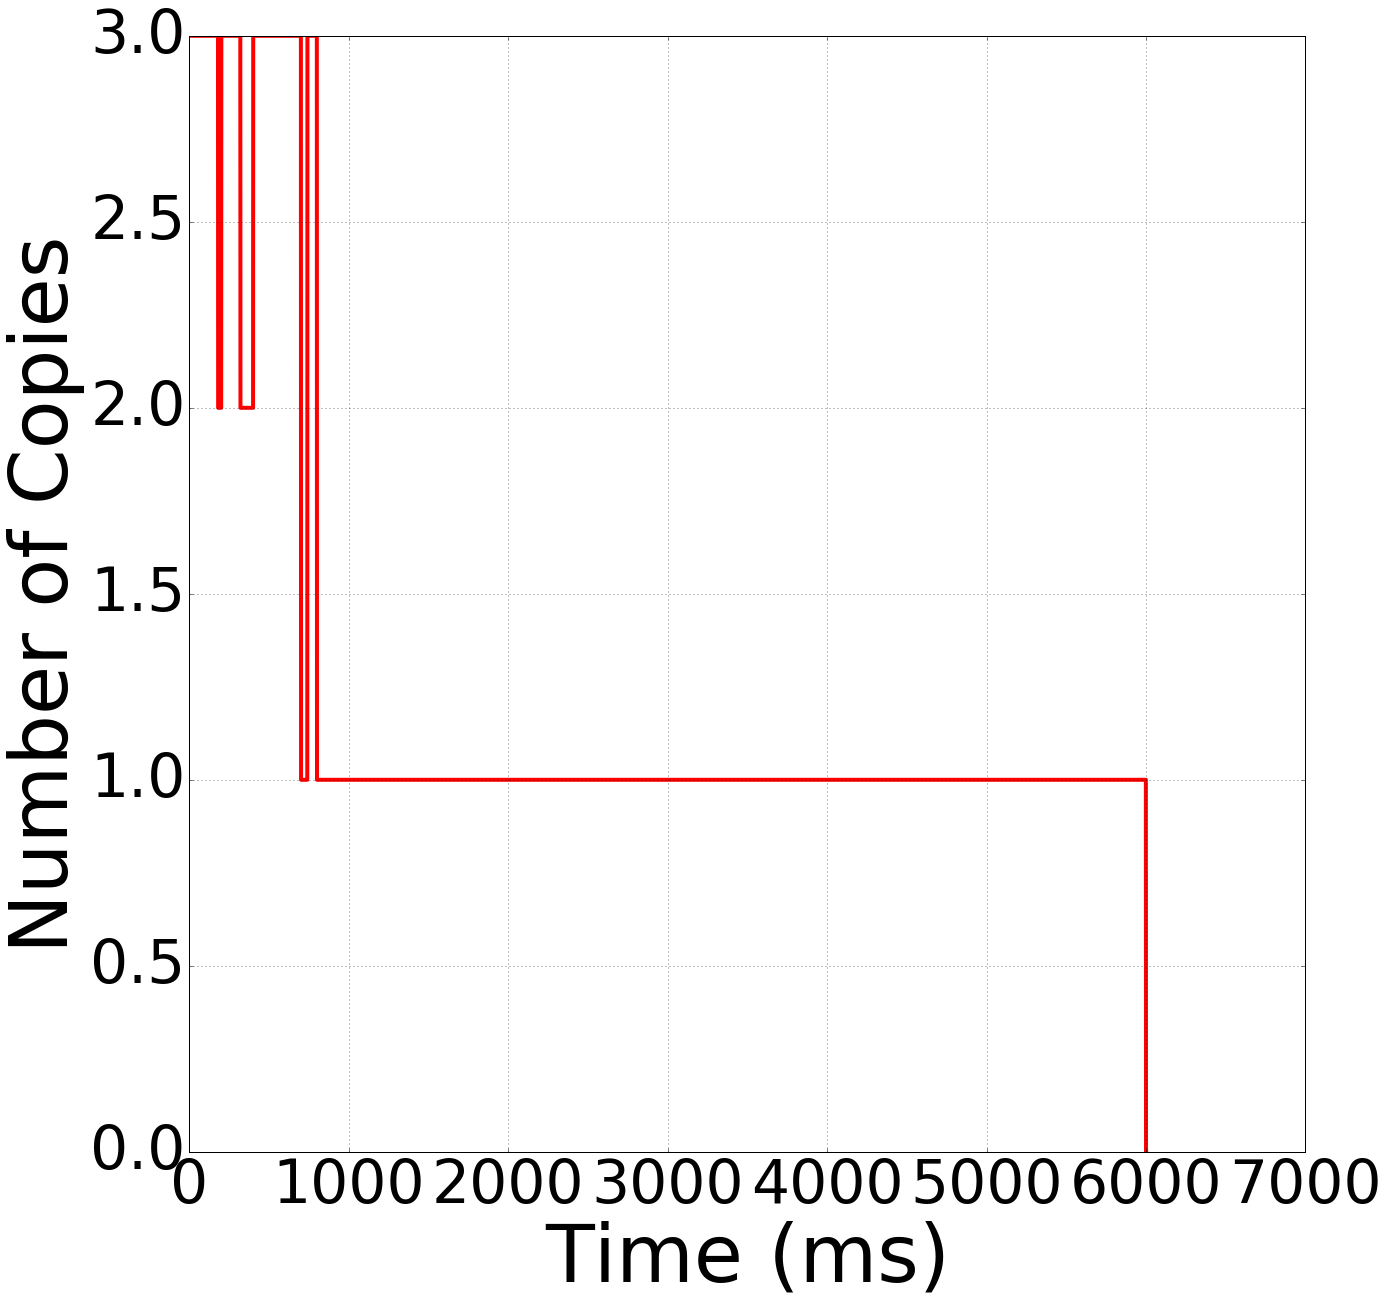

In [103]:
copies_v1_ada = np.genfromtxt('copies_v1_ada.csv', delimiter=',')
plt.figure(figsize=(20, 20))
plt.plot(copies_v1_ada, '-r', lw=4)
plt.xlabel('Time (ms)', fontsize=80)
plt.ylabel('Number of Copies', fontsize=80)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
plt.legend(loc='lower left', fontsize=40)

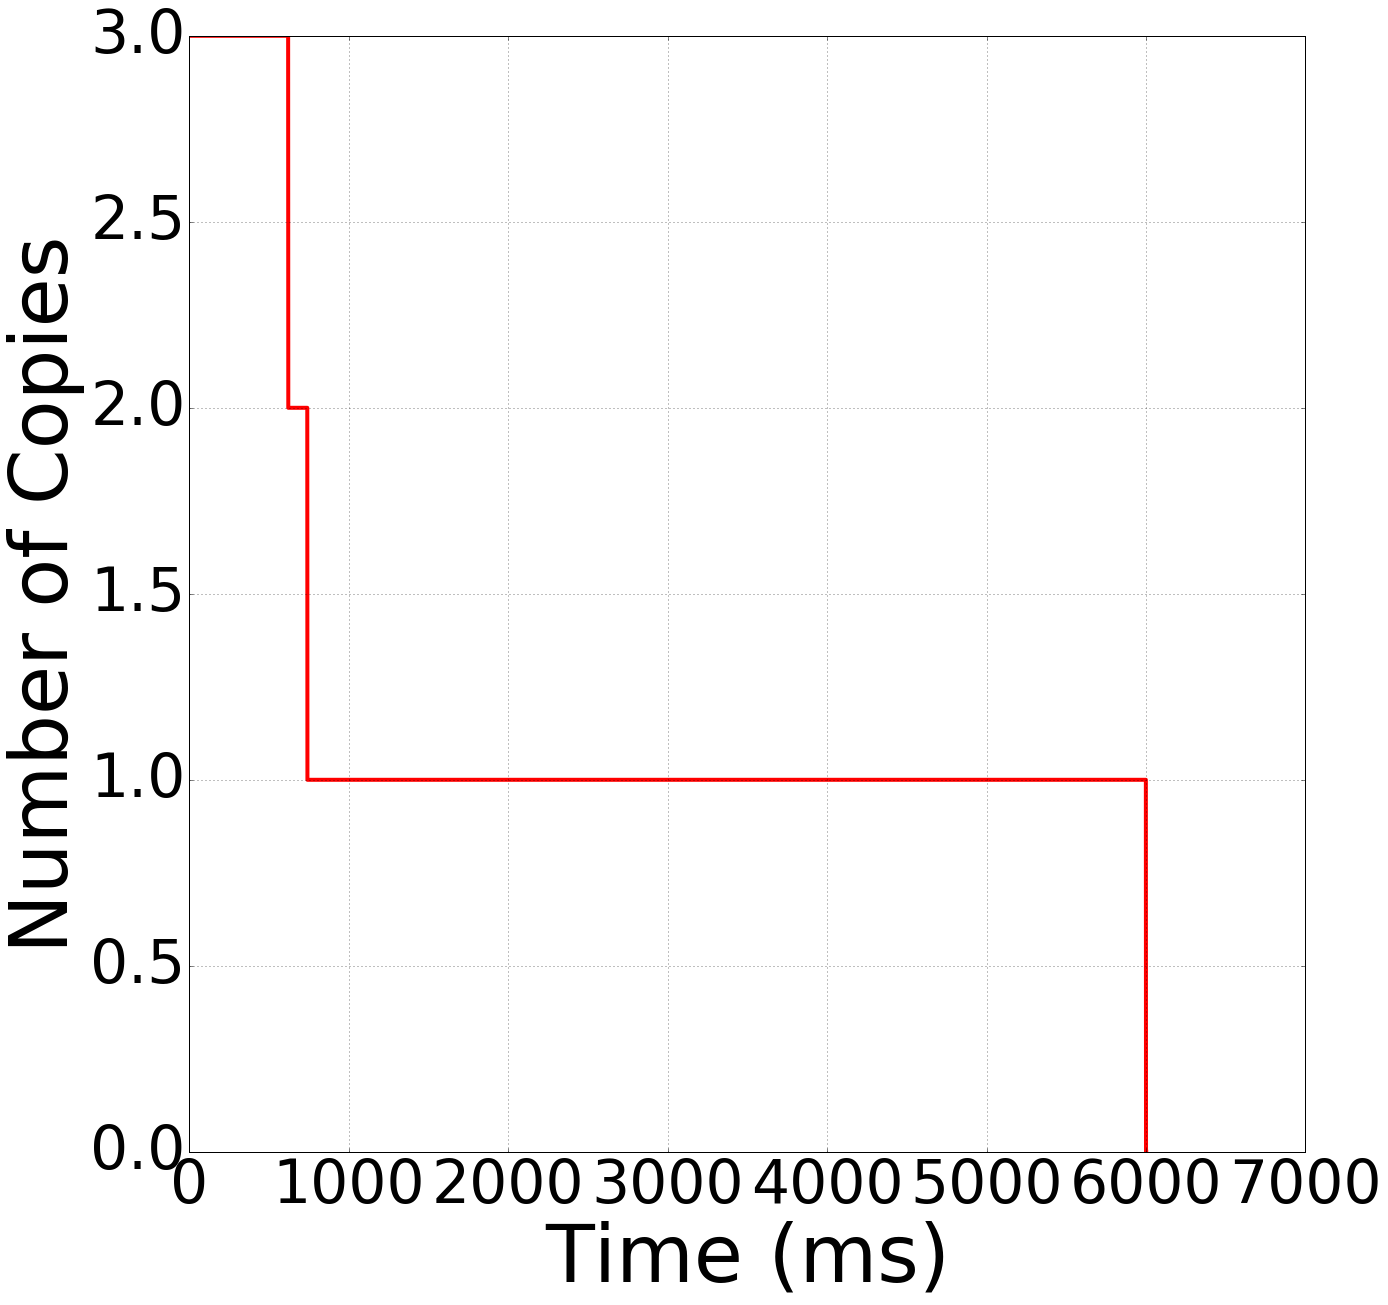

In [104]:
copies_v2_ada = np.genfromtxt('copies_v2_ada.csv', delimiter=',')
plt.figure(figsize=(20, 20))
plt.plot(copies_v2_ada, '-r', lw=4)
plt.xlabel('Time (ms)', fontsize=80)
plt.ylabel('Number of Copies', fontsize=80)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
plt.legend(loc='lower left', fontsize=40)

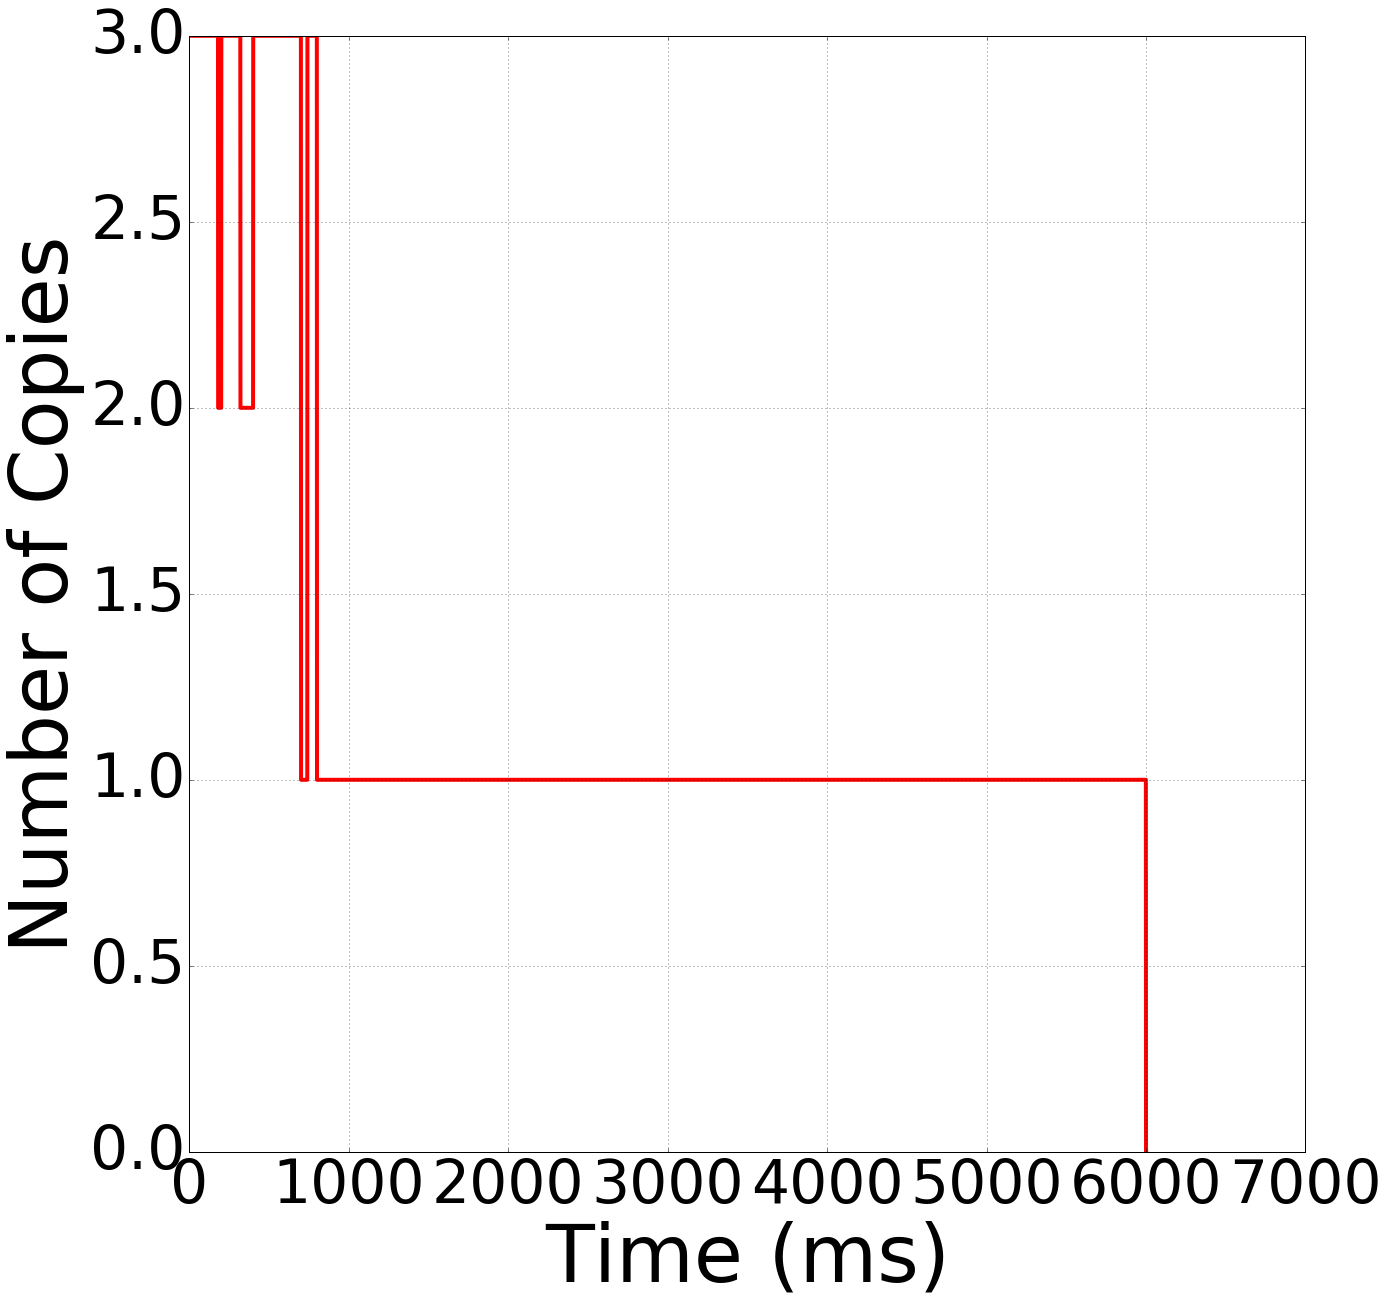

In [105]:
copies_vmix_ada = np.genfromtxt('copies_vmix_ada.csv', delimiter=',')
plt.figure(figsize=(20, 20))
plt.plot(copies_vmix_ada, '-r', lw=4)
plt.xlabel('Time (ms)', fontsize=80)
plt.ylabel('Number of Copies', fontsize=80)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
plt.legend(loc='lower left', fontsize=40)

In [ ]:
styles = ['-ro']
linewidths = [4 for i in range(7)]
cols = ['MTTF All On', 'MTTF AdaFT', 'MTTF AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    mttf_power[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Version 2 Power (watt)', fontsize=80)
plt.ylabel('MTTF (Year)', fontsize=80)
# plt.xticks(np.arange(5),mttf_power['Version 2 Power'])
plt.grid(True)
plt.legend(loc='lower left', fontsize=40)

In [13]:
xs_vmix_ada_dvfs.head(0)

Empty DataFrame
Columns: [-4.500870000000000148e-01, -4.501894081830000172e-01, -4.503072201005159925e-01, -4.504404343518935150e-01, -4.505890525831319771e-01, -4.507530794865402535e-01, -4.509325228012229236e-01, -4.511273933143968851e-01, -4.513377048635390798e-01, -4.515634743393652228e-01, -4.519073078868893756e-01, -4.523692285155690440e-01, -4.529492954170985519e-01, -4.536476039717208808e-01, -4.544642857649069390e-01, -4.553995086144037030e-01, -4.564534766076560612e-01, -4.576264301496101305e-01, -4.589186460209085383e-01, -4.603304374464916027e-01, -4.618621541746201764e-01, -4.635141825663405823e-01, -4.652869456954132898e-01, -4.671809034587313669e-01, -4.691965526972564637e-01, -4.713344273275042462e-01, -4.735950984836133082e-01, -4.759791746700350878e-01, -4.784873019248847559e-01, -4.811201639939970409e-01, -4.838733465284700830e-01, -4.867476092547979860e-01, -4.897437487996978422e-01, -4.928625989074781333e-01, -4.961050306679803956e-01, -4.994719527551559346e-01, -5.029643116763418131e-01, -5.065830920323047826e-01, -5.103293167881230996e-01, -5.142040475549802814e-01, -5.182083848829482919e-01, -5.223434685648392639e-01, -5.266104779512096323e-01, -5.310106322766025011e-01, -5.355451909971180591e-01, -5.402154541394046383e-01, -5.450227626611656717e-01, -5.499684988232825811e-01, -5.550540865736557361e-01, -5.602809919428680674e-01, -5.655418531224717382e-01, -5.708382215432505902e-01, -5.761716597749239055e-01, -5.815437419702289557e-01, -5.869560543122058771e-01, -5.924101954648128832e-01, -5.979077770269977110e-01, -6.034504239903528688e-01, -6.090397752004854670e-01, -6.146774838222294202e-01, -6.203652178088320257e-01, -6.261046603752478124e-01, -6.318975104756712202e-01, -6.377454832854437816e-01, -6.436503106874708058e-01, -6.496137417632850131e-01, -6.556375432888943422e-01, -6.617235002355539297e-01, -6.678734162756034820e-01, -6.740891142935112601e-01, -6.802282349687566176e-01, -6.862926411647458647e-01, -6.922841740109968445e-01, -6.982046534364633184e-01, -7.040558786966618632e-01, -7.098396288947541599e-01, -7.155576634967327765e-01, -7.212117228408599923e-01, -7.268035286415045482e-01, -7.323347844875220947e-01, -7.378071763353215573e-01, -7.432223729967599724e-01, -7.485820266220042374e-01, -7.538877731775001090e-01, -7.591412329191844499e-01, -7.643440108610766170e-01, -7.694976972393833270e-01, -7.746038679722508924e-01, -7.796640851152952800e-01, -7.846798973130416632e-01, -7.895442604177291823e-01, -7.942586975903013213e-01, -7.988246880015338336e-01, -8.032436672683924694e-01, -8.075170278778309729e-01, -8.116461195981532484e-01, -8.156322498780596009e-01, -8.194766842334944013e-01, -8.231806466224083074e-01, -8.267453198075450649e-01, ...]
Index: []

[0 rows x 6002 columns]

In [6]:
taaf_v1 = pd.concat([taaf_v1_all_on, taaf_v1_ada], axis=1)
taaf_v1.columns = ['TAAF Version 1 All On', 'TAAF Version 1 AdaFT']
taaf_v2 = pd.concat([taaf_v2_all_on, taaf_v2_ada], axis=1)
taaf_v2.columns = ['TAAF Version 2 All On', 'TAAF Version 2 AdaFT']
taaf_vmix = pd.concat([taaf_vmix_all_on, taaf_vmix_ada], axis=1)
taaf_vmix.columns = ['TAAF Version Mix All On', 'TAAF Version Mix AdaFT']

In [7]:
taaf_ada = pd.concat([taaf_v1_ada, taaf_v2_ada, taaf_vmix_ada], axis = 1)
taaf_ada.columns=['TAAF Version 1 AdaFT', 'TAAF Version 2 AdaFT', 'TAAF Version Mix AdaFT']
taaf_all_on = pd.concat([taaf_v1_all_on, taaf_v2_all_on, taaf_vmix_all_on], axis = 1)
taaf_all_on.columns=['TAAF Version 1 All On', 'TAAF Version 2 All On', 'TAAF Version Mix All On']


In [8]:
taaf_vmix_with_dvfs = pd.concat([taaf_vmix_all_on, taaf_vmix_ada, taaf_vmix_ada_dvfs], axis=1)
taaf_vmix_with_dvfs.columns = ['TAAF Version Mix All On', 'TAAF Version Mix AdaFT', 'TAAF Version Mix AdaFT with DVFS']

In [8]:
taaf = pd.concat([taaf_v1_all_on, taaf_v1_ada, taaf_v2_all_on, taaf_v2_ada, 
                  taaf_vmix_all_on, taaf_vmix_ada, taaf_vmix_ada_dvfs], axis = 1)
taaf.columns = ['TAAF Version 1 All On', 'TAAF Version 1 AdaFT', 'TAAF Version 2 All On', 'TAAF Version 2 AdaFT',
               'TAAF Version Mix All On', 'TAAF Version Mix AdaFT', 'TAAF Version Mix AdaFT with DVFS']
taaf.head()

TAAF Version 1 All On  TAAF Version 1 AdaFT  TAAF Version 2 All On  \
0               1.001513              1.001513               1.000871   
1               1.002430              1.002430               1.000916   
2               1.003346              1.003346               1.000961   
3               1.004263              1.004263               1.001005   
4               1.004304              1.004304               1.001050   

   TAAF Version 2 AdaFT  TAAF Version Mix All On  TAAF Version Mix AdaFT  \
0              1.000871                 1.001513                1.001513   
1              1.000916                 1.002430                1.002430   
2              1.000961                 1.003346                1.003346   
3              1.001005                 1.004263                1.004263   
4              1.001050                 1.004304                1.004304   

   TAAF Version Mix AdaFT with DVFS  
0                          1.000710  
1                          1.000824  
2                          1.000938  
3                          1.001052  
4                          1.001165

In [35]:
taaf_vmix_ada_rf[150:] = taaf_vmix_ada_rf[150:] / 1.01
taaf_vmix_ada_rf[taaf_vmix_ada_rf < 1.] = 1.
taaf_with_rf = pd.concat([taaf_vmix_ada[:5000], taaf_vmix_ada_rf[:5000]], axis = 1)
taaf_with_rf.columns = ['TAAF Version Mix AdaFT', 'TAAF Version Mix AdaFT with Q-learning']
taaf_with_rf.head()

TAAF Version Mix AdaFT  TAAF Version Mix AdaFT with Q-learning
0                1.001513                                1.001146
1                1.002430                                1.001695
2                1.003346                                1.001740
3                1.004263                                1.001784
4                1.004304                                1.001828

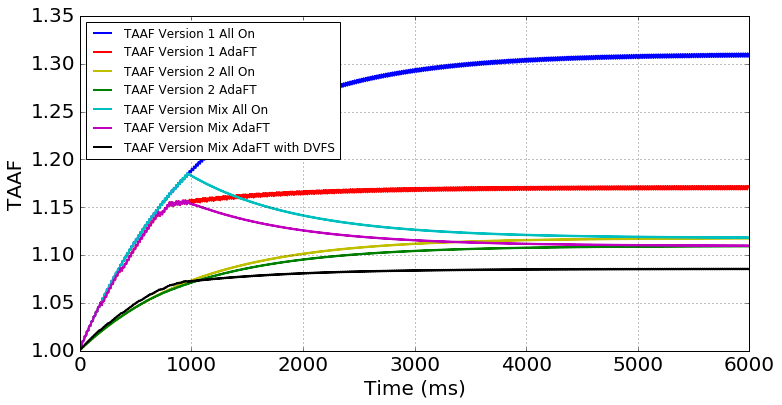

In [25]:
styles = ['b','r','y', 'g', 'c', 'm', 'k']
linewidths = [2 for i in range(7)]
for col, style, lw in zip(taaf.columns, styles, linewidths):
    taaf[col].plot(style=style, lw=lw, figsize=(12, 6), fontsize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)
plt.grid(True)
plt.legend(loc=2)

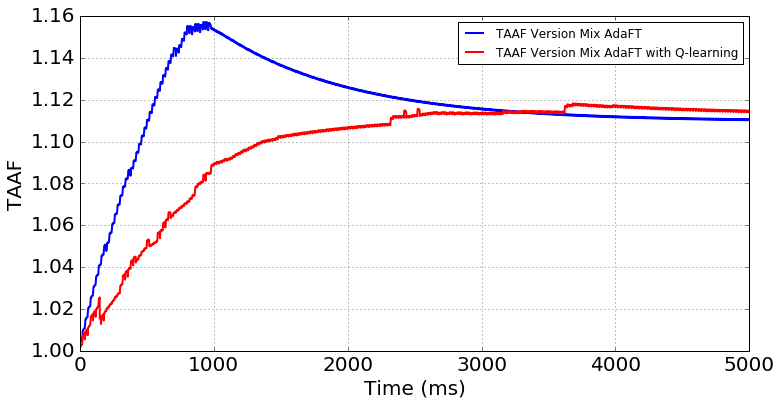

In [36]:
styles = ['b','r']
linewidths = [2 for i in range(2)]
for col, style, lw in zip(taaf_with_rf.columns, styles, linewidths):
    taaf_with_rf[col].plot(style=style, lw=lw, figsize=(12, 6), fontsize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)
plt.grid(True)
plt.legend(loc=1)

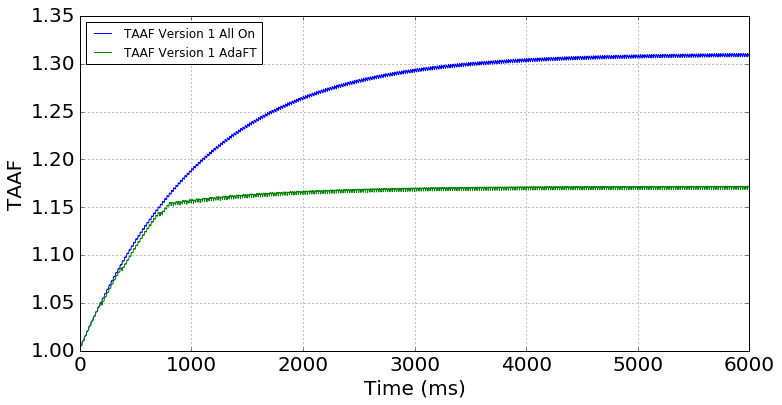

In [37]:
taaf_v1.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

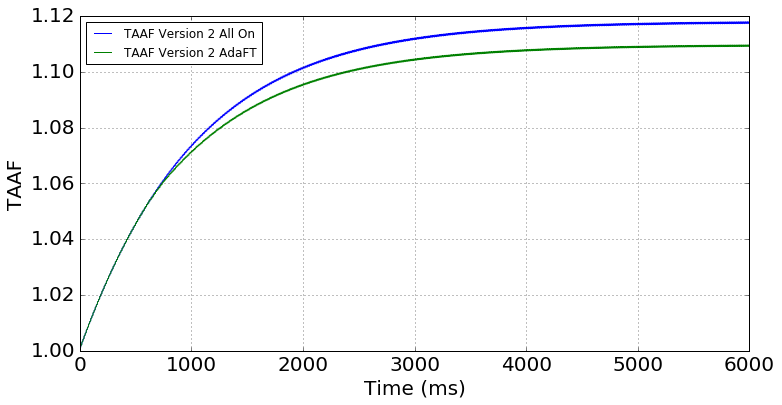

In [38]:
taaf_v2.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

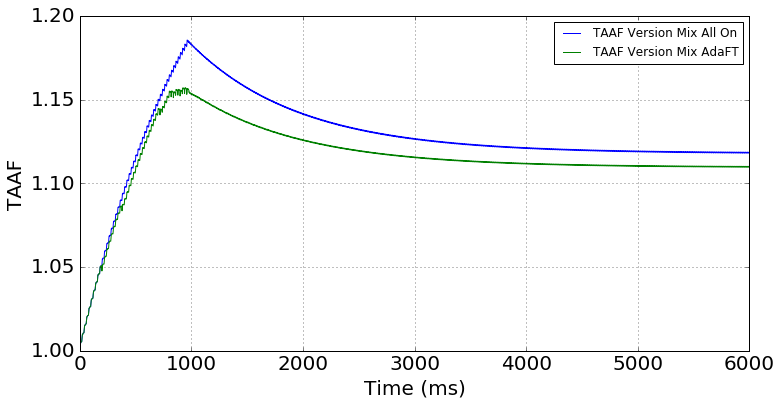

In [39]:
taaf_vmix.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

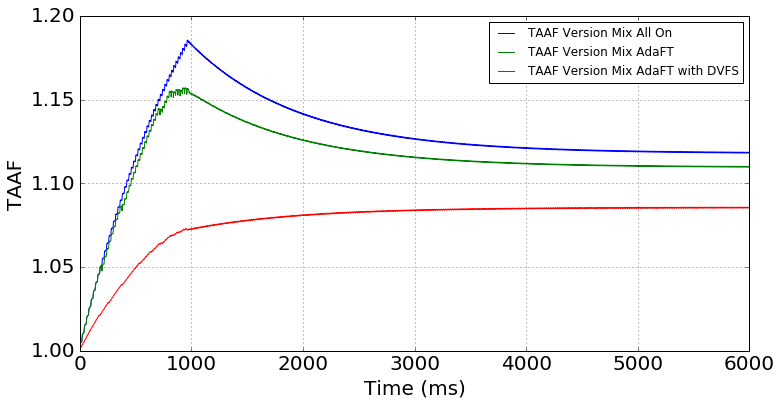

In [9]:
taaf_vmix_with_dvfs.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

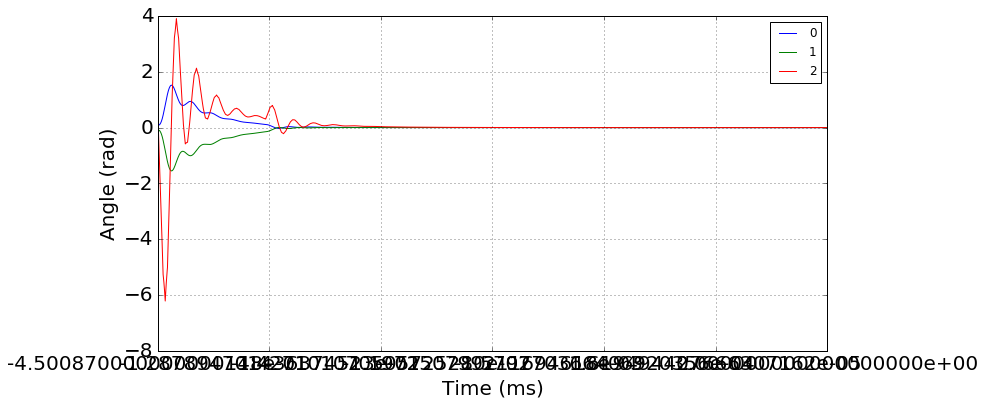

In [12]:
xs_vmix_ada_dvfs.transpose().ix[:, 0:2].plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Angle (rad)', fontsize=20)

In [ ]:
xs_vmix_ada_dvfs.ix[:, 3:6].plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Rate (rad/s)', fontsize=20)

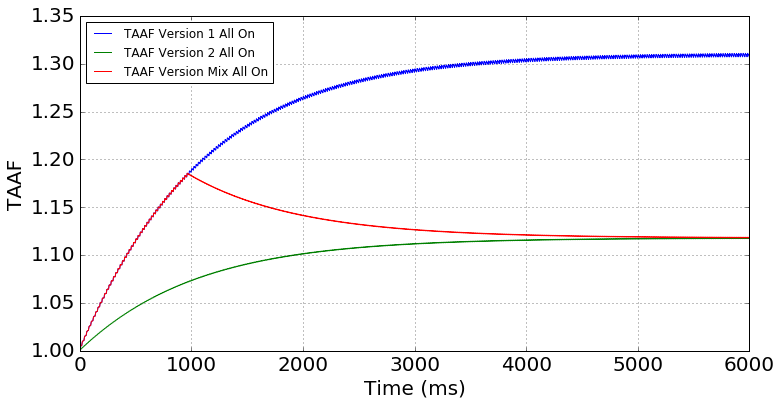

In [40]:
taaf_all_on.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

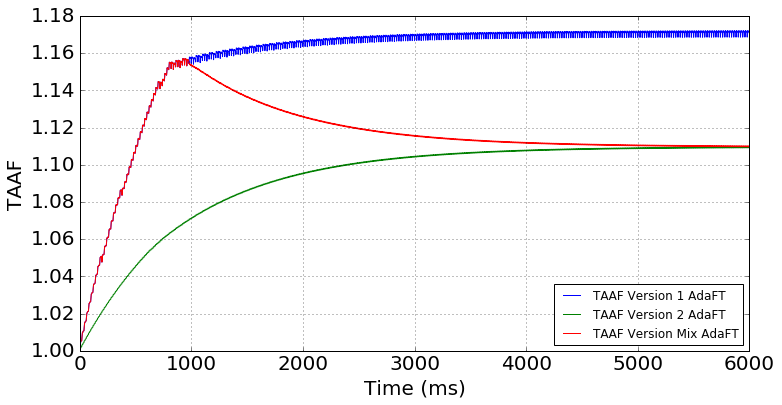

In [41]:
taaf_ada.plot(grid=True, figsize=(12, 6), fontsize=20)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('TAAF', fontsize=20)

In [5]:
mttfs = pd.read_csv('mttfs.csv')
mttfs_energy = pd.read_csv('mttfs_energy.csv')
hardware = pd.read_csv('hardware_provisioning.csv')
mttfs_energy.head()

Unnamed: 0  Energy AdaFT  Energy AdaFT DVFS  Energy All On  Energy DVFS  \
0           0        7.0485             5.7460         7.4625       5.8890   
1           1        6.5710             5.6885         6.7125       5.7845   
2           2        5.9185             5.6050         6.0375       5.6855   
3           3        5.5530             5.5530         5.6250       5.6250   
4           4        5.9090             4.9315         6.2250       5.0355   

   MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  Number of Processors  \
0    8.978554         9.190215     8.916027   9.169352                     3   
1    9.054567         9.199703     9.033655   9.186501                     3   
2    9.163982         9.213682     9.144397   9.203189                     3   
3    9.222468         9.222468     9.213395   9.213395                     3   
4    9.139702         9.301942     9.093571   9.286628                     4   

   QoC Constraint  Version 1 Execution Time  Version 1 Power  Version 1 WCET  \
0            0.15                     0.004               10           0.008   
1            0.35                     0.004               10           0.008   
2            0.55                     0.004               10           0.008   
3            0.75                     0.004               10           0.008   
4            0.15                     0.004               10           0.008   

   Version 2 Execution Time  Version 2 Power  Version 2 WCET  
0                     0.001              1.0           0.001  
1                     0.001              1.0           0.001  
2                     0.001              1.0           0.001  
3                     0.001              1.0           0.001  
4                     0.001              1.0           0.001

In [6]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, fontsize=30, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize=30);

In [14]:
mttfs_energy.columns

Index(['Unnamed: 0', 'Energy AdaFT', 'Energy AdaFT DVFS', 'Energy All On',
       'Energy DVFS', 'MTTF AdaFT', 'MTTF AdaFT DVFS', 'MTTF All On',
       'MTTF DVFS', 'Number of Processors', 'QoC Constraint',
       'Version 1 Execution Time', 'Version 1 Power', 'Version 1 WCET',
       'Version 2 Execution Time', 'Version 2 Power', 'Version 2 WCET'],
      dtype='object')

In [12]:
hard = hardware[[u'MTTF AdaFT', u'MTTF AdaFT DVFS', u'MTTF All On',
               u'MTTF DVFS', u'Number of Processors', u'QoC Constraint',
               u'Version 2 Execution Time', u'Version 2 Power', u'Version 2 WCET', u'Energy All On',
                            u'Energy AdaFT',u'Energy AdaFT DVFS',u'Energy DVFS']]
hard

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  Number of Processors  \
0     8.936275         9.189884     8.794494   9.169354                     3   
1     9.107134         9.301949     9.000682   9.286632                     4   
2     9.207913         9.367807     9.123051   9.355542                     5   
3     9.277060         9.410724     9.202539   9.399937                     6   
4     9.328157         9.443913     9.265539   9.435108                     7   
5     9.364723         9.467803     9.310586   9.460091                     8   
6     9.393932         9.485511     9.343612   9.478333                     9   
7     9.416974         9.501454     9.374200   9.495285                    10   
8     9.437094         9.513682     9.397367   9.508071                    11   
9     9.452470         9.523172     9.415110   9.517815                    12   
10    9.466377         9.532597     9.433328   9.527869                    13   
11    9.478674         9.539999     9.447398   9.535610                    14   
12    9.488361         9.545883     9.458315   9.541594                    15   
13    9.497319         9.552128     9.470452   9.548287                    16   
14    9.504800         9.557079     9.479934   9.553474                    17   
15    9.512286         9.561030     9.487233   9.557473                    18   
16    9.518590         9.565511     9.496009   9.562292                    19   
17    9.523885         9.569033     9.502753   9.565991                    20   
18    8.890521         9.099253     8.663847   8.911354                     3   
19    9.071670         9.231164     8.900335   9.089866                     4   
20    9.178902         9.308429     9.041145   9.195491                     5   
21    9.252408         9.362253     9.132705   9.263802                     6   
22    9.304515         9.398941     9.205493   9.318247                     7   
23    9.345628         9.428907     9.257518   9.356970                     8   
24    9.375873         9.450463     9.295660   9.385237                     9   
25    9.401269         9.468693     9.331078   9.411644                    10   
26    9.421194         9.482867     9.357908   9.431556                    11   
27    9.439023         9.495876     9.378415   9.446703                    12   
28    9.453236         9.505912     9.399532   9.462417                    13   
29    9.465780         9.514941     9.415844   9.474503                    14   
30    9.476171         9.522303     9.428473   9.483816                    15   
31    9.486274         9.529709     9.442567   9.494314                    16   
32    9.494265         9.535329     9.453537   9.502413                    17   
33    9.501798         9.540688     9.462003   9.508649                    18   
34    9.508191         9.545219     9.472185   9.516205                    19   
35    9.514656         9.549967     9.480012   9.522001                    20   

    QoC Constraint  Version 2 Execution Time  Version 2 Power  Version 2 WCET  \
0             0.15                     0.001              6.0           0.002   
1             0.15                     0.001              6.0           0.002   
2             0.15                     0.001              6.0           0.002   
3             0.15                     0.001              6.0           0.002   
4             0.15                     0.001              6.0           0.002   
5             0.15                     0.001              6.0           0.002   
6             0.15                     0.001              6.0           0.002   
7             0.15                     0.001              6.0           0.002   
8             0.15                     0.001              6.0           0.002   
9             0.15                     0.001              6.0           0.002   
10            0.15                     0.001              6.0           0.002   
11            0.15                

In [15]:
mttfs_energy = mttfs_energy[[u'MTTF AdaFT', u'MTTF AdaFT DVFS', u'MTTF All On',
               u'MTTF DVFS', u'Number of Processors', u'QoC Constraint',
               u'Version 2 Execution Time', u'Version 2 Power', u'Version 2 WCET', u'Energy All On',
                            u'Energy AdaFT',u'Energy AdaFT DVFS',u'Energy DVFS']]
mttfs_energy.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  Number of Processors  \
0    8.978554         9.190215     8.916027   9.169352                     3   
1    9.054567         9.199703     9.033655   9.186501                     3   
2    9.163982         9.213682     9.144397   9.203189                     3   
3    9.222468         9.222468     9.213395   9.213395                     3   
4    9.139702         9.301942     9.093571   9.286628                     4   

   QoC Constraint  Version 2 Execution Time  Version 2 Power  Version 2 WCET  \
0            0.15                     0.001              1.0           0.001   
1            0.35                     0.001              1.0           0.001   
2            0.55                     0.001              1.0           0.001   
3            0.75                     0.001              1.0           0.001   
4            0.15                     0.001              1.0           0.001   

   Energy All On  Energy AdaFT  Energy AdaFT DVFS  Energy DVFS  
0         7.4625        7.0485             5.7460       5.8890  
1         6.7125        6.5710             5.6885       5.7845  
2         6.0375        5.9185             5.6050       5.6855  
3         5.6250        5.5530             5.5530       5.6250  
4         6.2250        5.9090             4.9315       5.0355

In [9]:
mttfs = mttfs[[u'MTTF AdaFT', u'MTTF AdaFT DVFS', u'MTTF All On',
               u'MTTF DVFS', u'Number of Processors', u'QoC Constraint',
               u'Version 2 Execution Time', u'Version 2 Power', u'Version 2 WCET']]
mttfs.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  Number of Processors  \
0    9.217802         9.229010     8.916027   9.229010                     3   
1    9.217802         9.229010     9.206953   9.229010                     3   
2    9.224251         9.230043     9.213395   9.230043                     3   
3    9.224251         9.230043     9.213395   9.230043                     3   
4    9.323682         9.331771     9.315560   9.331771                     4   

   QoC Constraint  Version 2 Execution Time  Version 2 Power  Version 2 WCET  
0            0.15                     0.001              1.0           0.002  
1            0.35                     0.001              1.0           0.002  
2            0.55                     0.001              1.0           0.002  
3            0.75                     0.001              1.0           0.002  
4            0.15                     0.001              1.0           0.002

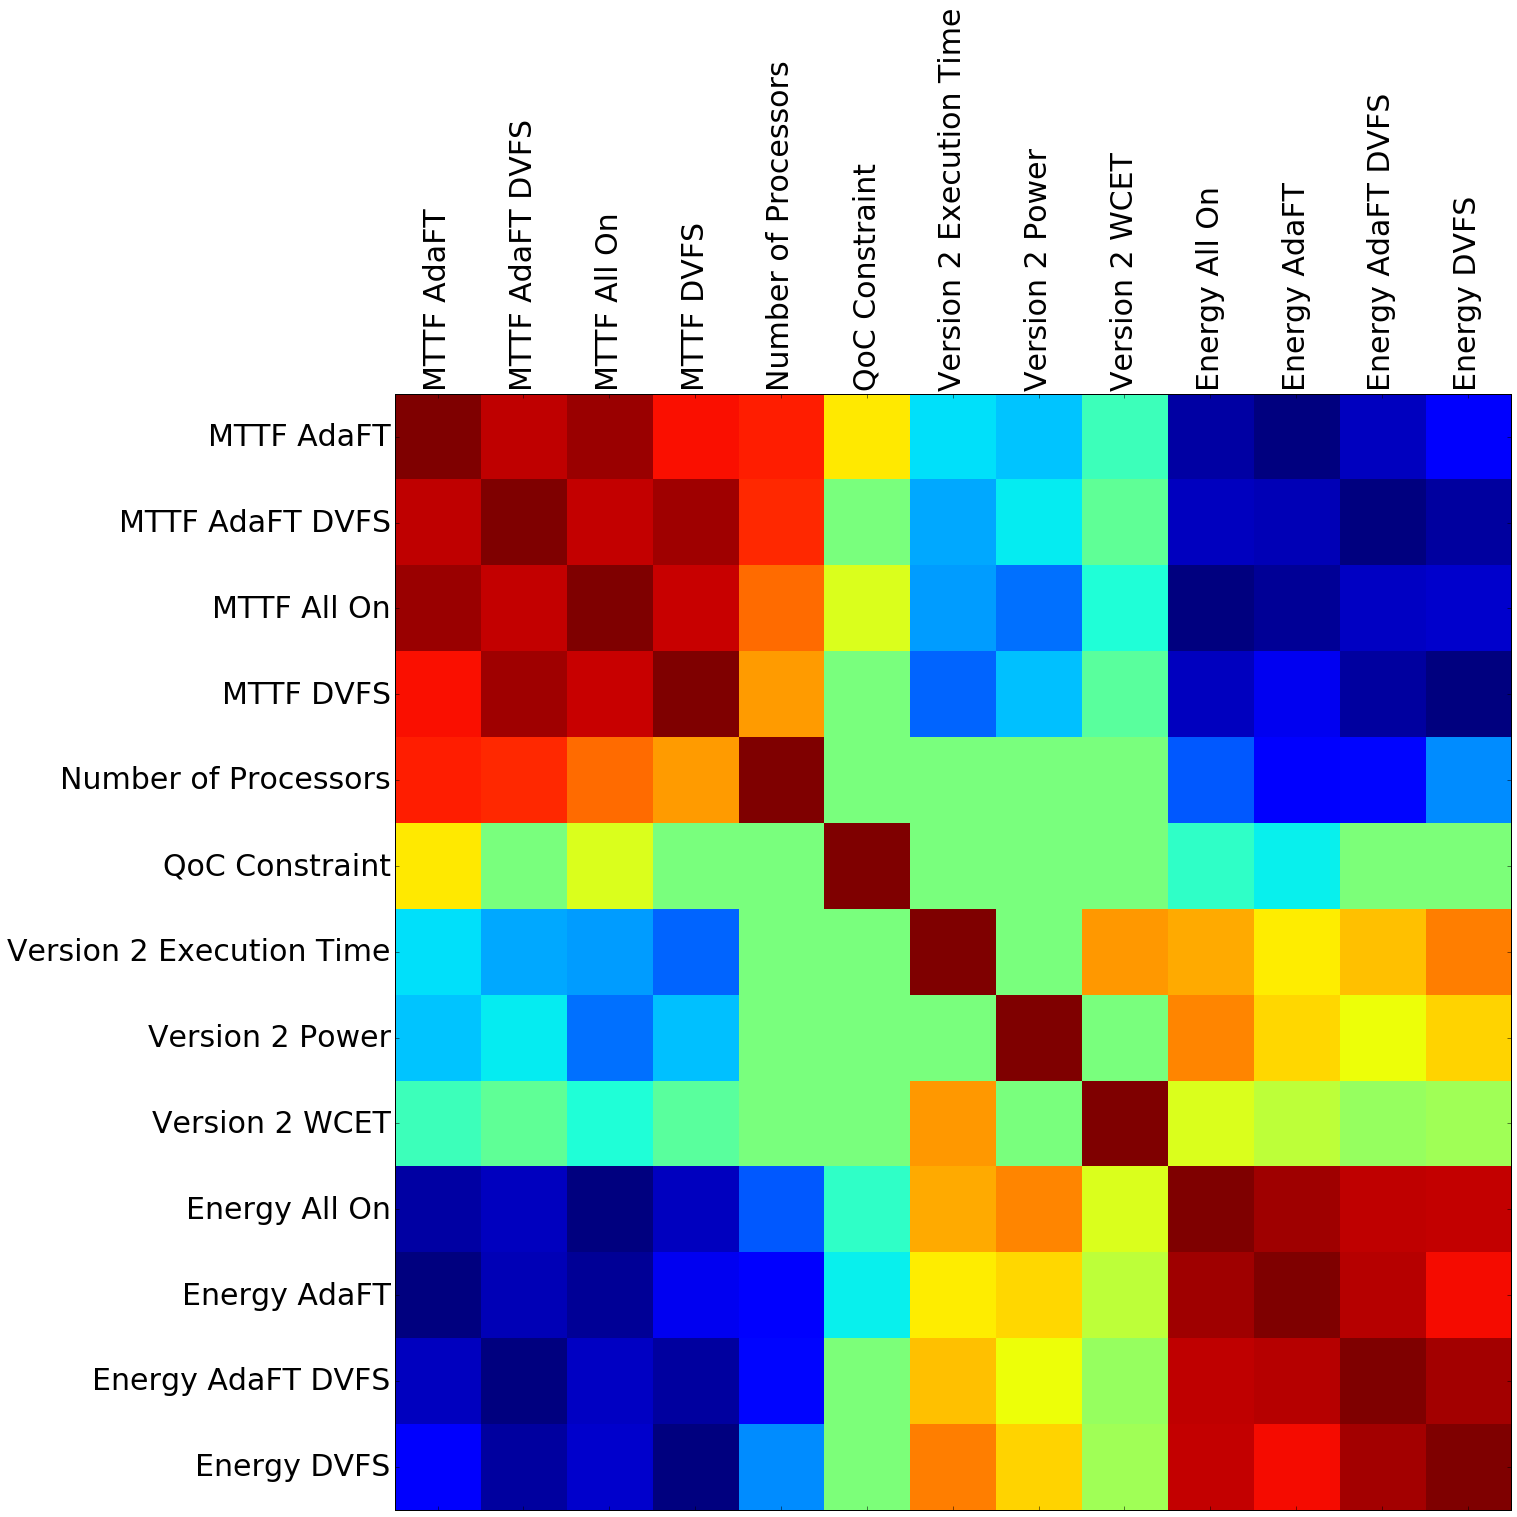

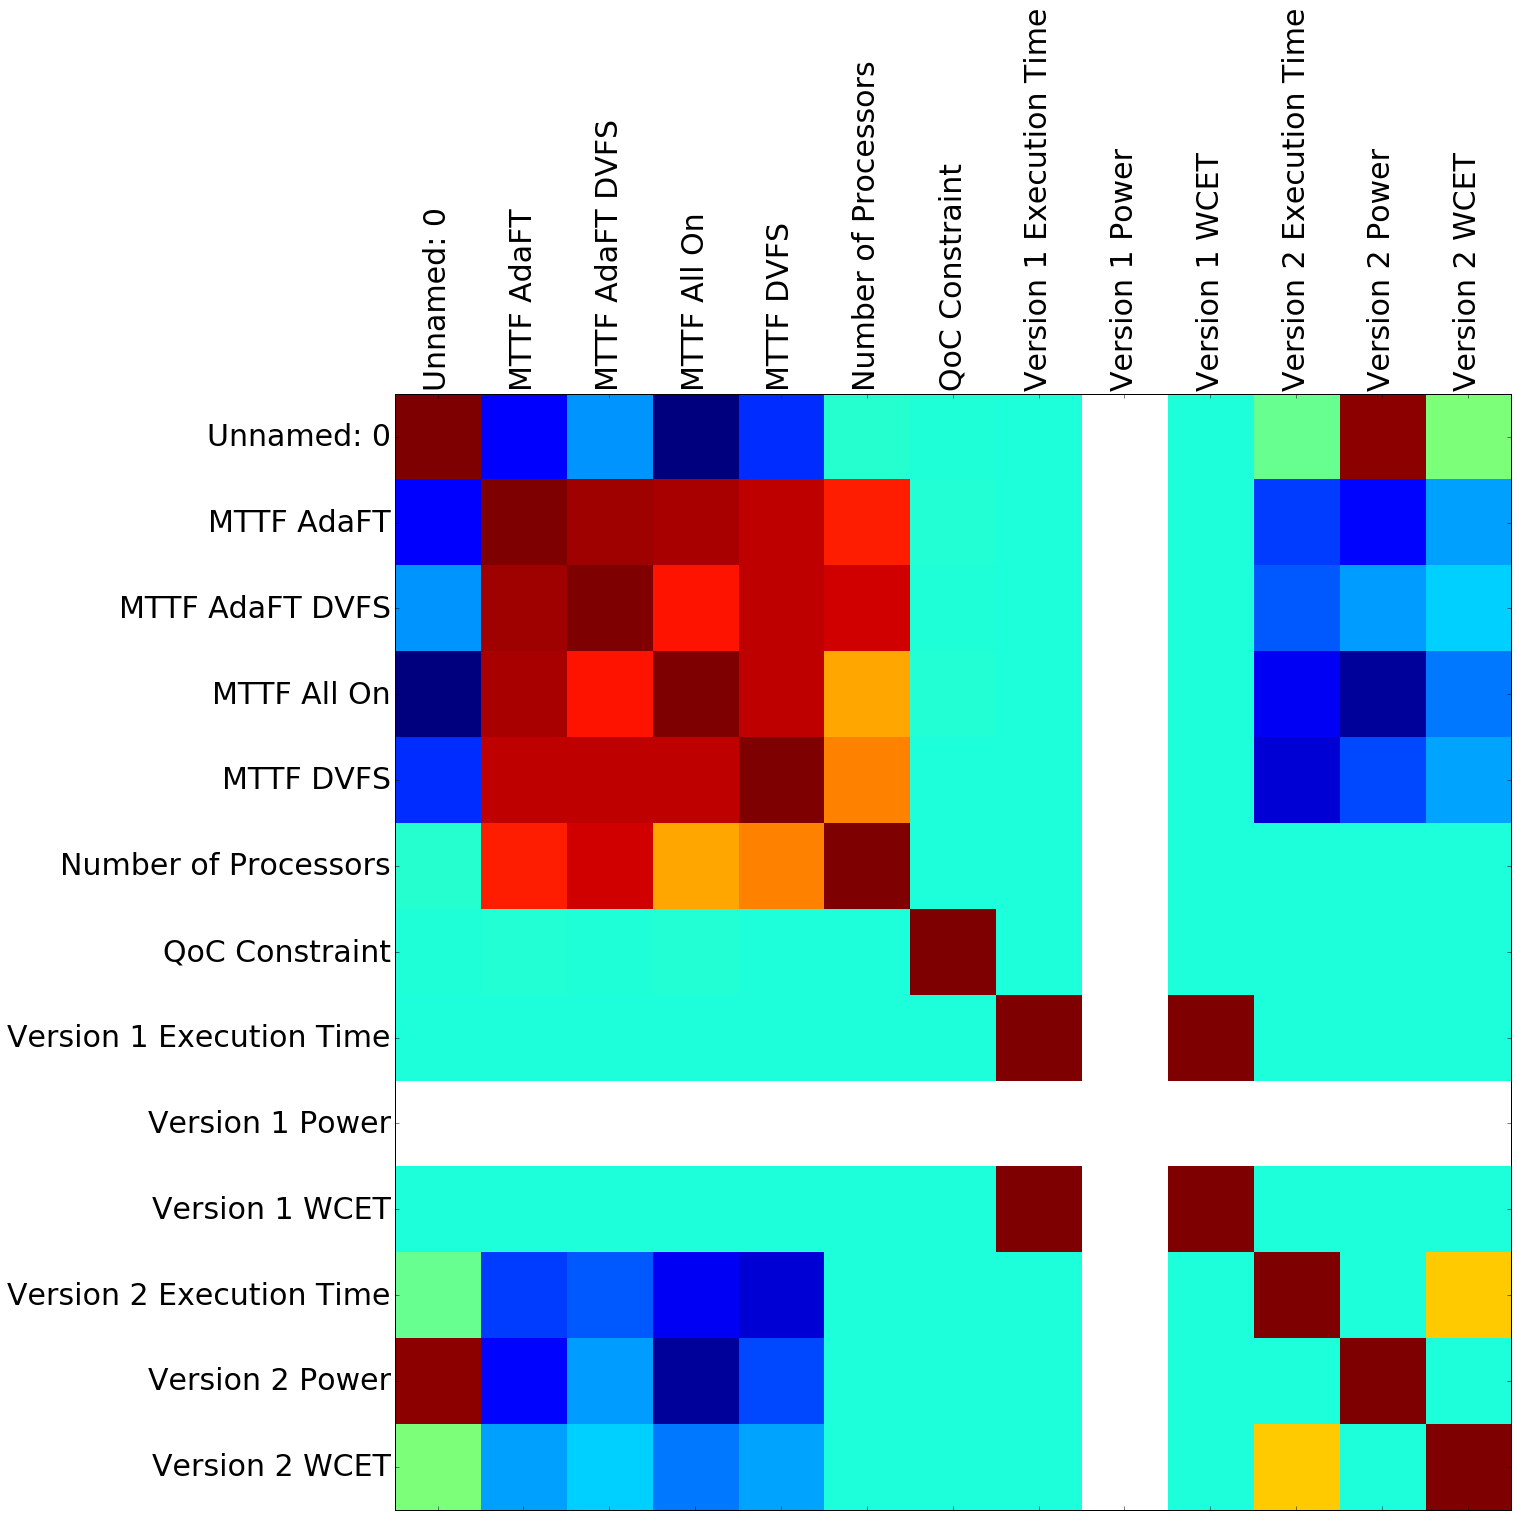

In [52]:
plot_corr(mttfs_energy, size=20)
plot_corr(mttfs, size=20)

In [13]:
hard = hard[(hard['Version 2 Execution Time'] == 0.001)]
hard.set_index(hard['Number of Processors'], inplace=True)
hard.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
Number of Processors                                                        
3                       8.936275         9.189884     8.794494   9.169354   
4                       9.107134         9.301949     9.000682   9.286632   
5                       9.207913         9.367807     9.123051   9.355542   
6                       9.277060         9.410724     9.202539   9.399937   
7                       9.328157         9.443913     9.265539   9.435108   

                      Number of Processors  QoC Constraint  \
Number of Processors                                         
3                                        3            0.15   
4                                        4            0.15   
5                                        5            0.15   
6                                        6            0.15   
7                                        7            0.15   

                      Version 2 Execution Time  Version 2 Power  \
Number of Processors                                              
3                                        0.001              6.0   
4                                        0.001              6.0   
5                                        0.001              6.0   
6                                        0.001              6.0   
7                                        0.001              6.0   

                      Version 2 WCET  Energy All On  Energy AdaFT  \
Number of Processors                                                
3                              0.002         8.4675        7.3885   
4                              0.002         6.9600        6.1730   
5                              0.002         6.0675        5.4395   
6                              0.002         5.5000        4.9395   
7                              0.002         5.0550        4.6045   

                      Energy AdaFT DVFS  Energy DVFS  
Number of Processors                                  
3                                5.7485       5.8890  
4                                4.9315       5.0355  
5                                4.4530       4.5290  
6                                4.1250       4.1945  
7                                3.8945       3.9475

In [16]:
mttf_power = mttfs_energy[(mttfs_energy['Number of Processors'] == 3) & 
                   (mttfs_energy['QoC Constraint'] == 0.15) & 
                   (mttfs_energy['Version 2 Execution Time'] == 0.002) &
                   (mttfs_energy['Version 2 WCET'] == 0.004)]
mttf_power.set_index(mttf_power['Version 2 Power'], inplace=True)
mttf_power.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
Version 2 Power                                                        
1.0                8.974228         9.194864     8.903759   9.181935   
3.0                8.940527         9.194674     8.806548   9.181935   
5.0                8.907138         9.189896     8.711004   9.169358   
7.0                8.873954         9.181202     8.617095   9.144287   
9.0                8.840967         9.172548     8.524787   9.119325   

                 Number of Processors  QoC Constraint  \
Version 2 Power                                         
1.0                                 3            0.15   
3.0                                 3            0.15   
5.0                                 3            0.15   
7.0                                 3            0.15   
9.0                                 3            0.15   

                 Version 2 Execution Time  Version 2 Power  Version 2 WCET  \
Version 2 Power                                                              
1.0                                 0.002              1.0           0.004   
3.0                                 0.002              3.0           0.004   
5.0                                 0.002              5.0           0.004   
7.0                                 0.002              7.0           0.004   
9.0                                 0.002              9.0           0.004   

                 Energy All On  Energy AdaFT  Energy AdaFT DVFS  Energy DVFS  
Version 2 Power                                                               
1.0                      7.563         7.095             5.7100        5.788  
3.0                      8.367         7.355             5.7100        5.788  
5.0                      9.171         7.623             5.7485        5.889  
7.0                      9.975         7.904             5.8165        6.091  
9.0                     10.779         8.159             5.8860        6.293

In [35]:
energy_power = mttfs_energy[(mttfs_energy['Number of Processors'] == 3) & 
                   (mttfs_energy['QoC Constraint'] == 0.15) & 
                   (mttfs_energy['Version 2 Execution Time'] == 0.002) &
                   (mttfs_energy['Version 2 WCET'] == 0.004)]
energy_power.set_index(energy_power['Version 2 Power'], inplace=True)
energy_power.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
Version 2 Power                                                        
1.0                8.974228         9.194864     8.903759   9.181935   
3.0                8.940527         9.194674     8.806548   9.181935   
5.0                8.907138         9.189896     8.711004   9.169358   
7.0                8.873954         9.181202     8.617095   9.144287   
9.0                8.840967         9.172548     8.524787   9.119325   

                 Number of Processors  QoC Constraint  \
Version 2 Power                                         
1.0                                 3            0.15   
3.0                                 3            0.15   
5.0                                 3            0.15   
7.0                                 3            0.15   
9.0                                 3            0.15   

                 Version 2 Execution Time  Version 2 Power  Version 2 WCET  \
Version 2 Power                                                              
1.0                                 0.002              1.0           0.004   
3.0                                 0.002              3.0           0.004   
5.0                                 0.002              5.0           0.004   
7.0                                 0.002              7.0           0.004   
9.0                                 0.002              9.0           0.004   

                 Energy All On  Energy AdaFT  Energy AdaFT DVFS  Energy DVFS  
Version 2 Power                                                               
1.0                      7.563         7.095             5.7100        5.788  
3.0                      8.367         7.355             5.7100        5.788  
5.0                      9.171         7.623             5.7485        5.889  
7.0                      9.975         7.904             5.8165        6.091  
9.0                     10.779         8.159             5.8860        6.293

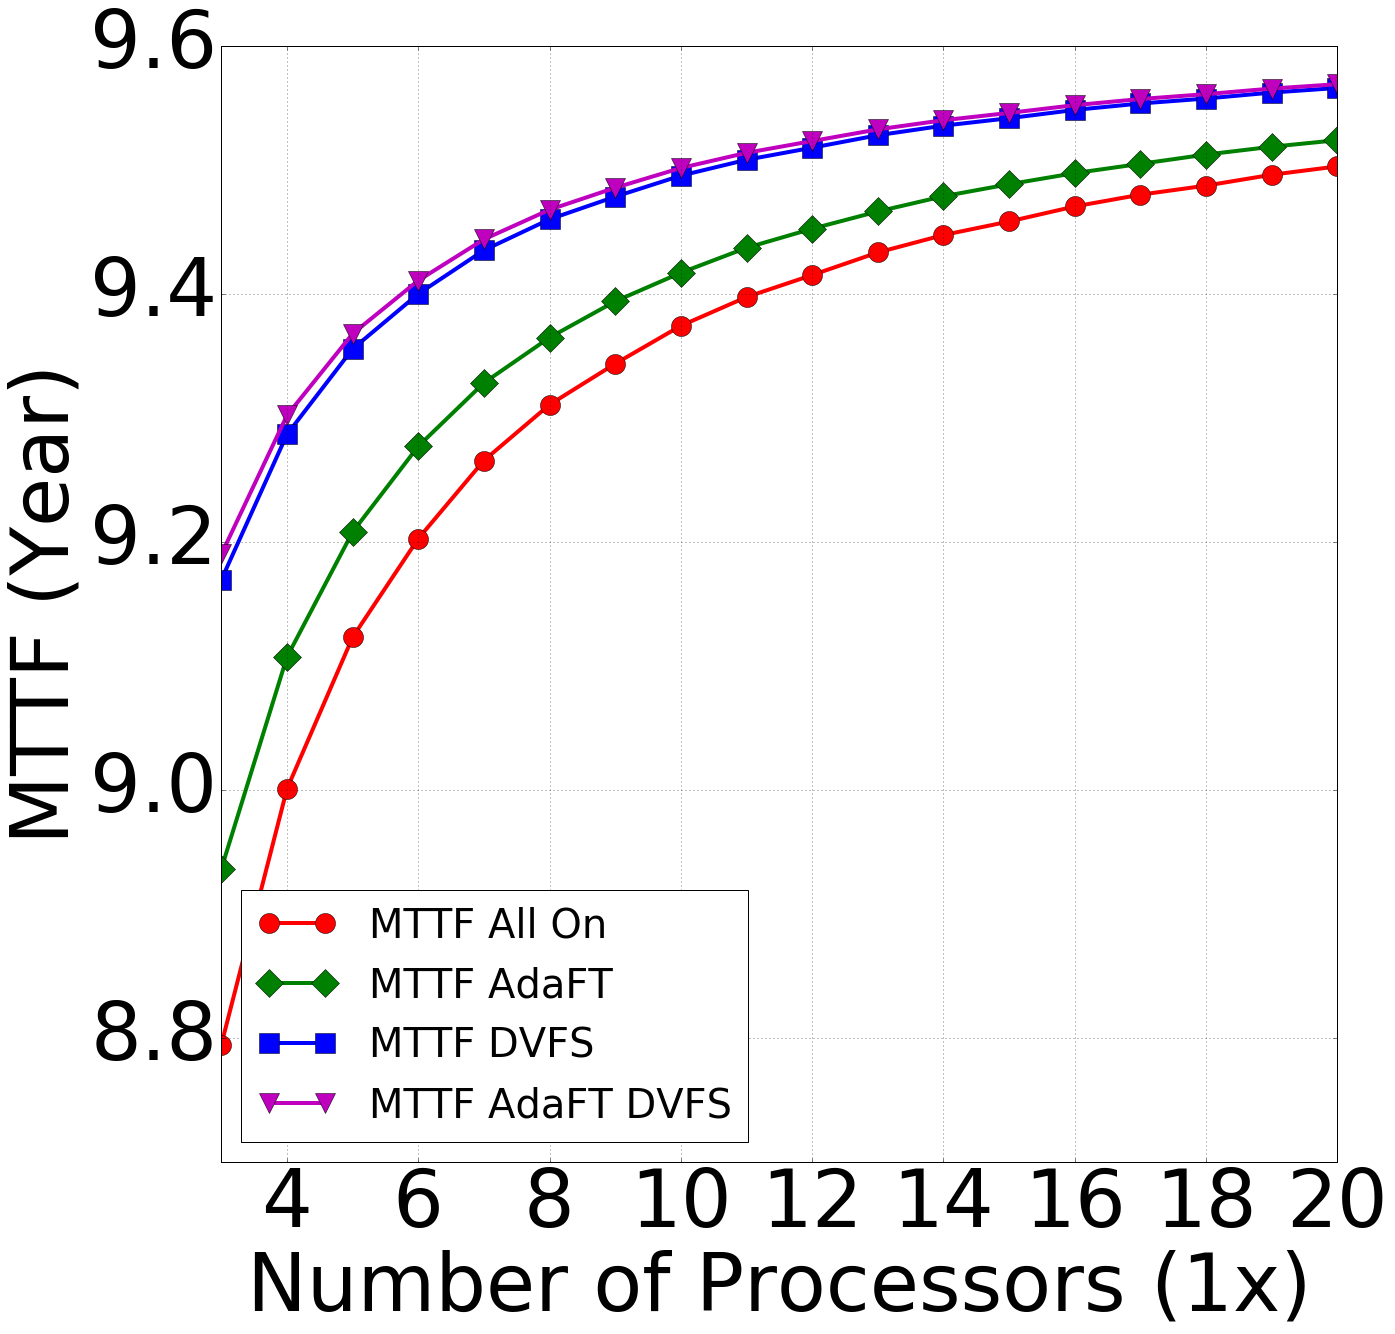

In [15]:
styles = ['-ro', '-gD', '-bs', '-mv']
linewidths = [4 for i in range(7)]
cols = ['MTTF All On', 'MTTF AdaFT', 'MTTF DVFS', 'MTTF AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    hard[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Number of Processors (1x)', fontsize=80)
plt.ylabel('MTTF (Year)', fontsize=80)
# plt.xticks(np.arange(5),mttf_power['Version 2 Power'])
plt.grid(True)
plt.legend(loc='lower left', fontsize=40)

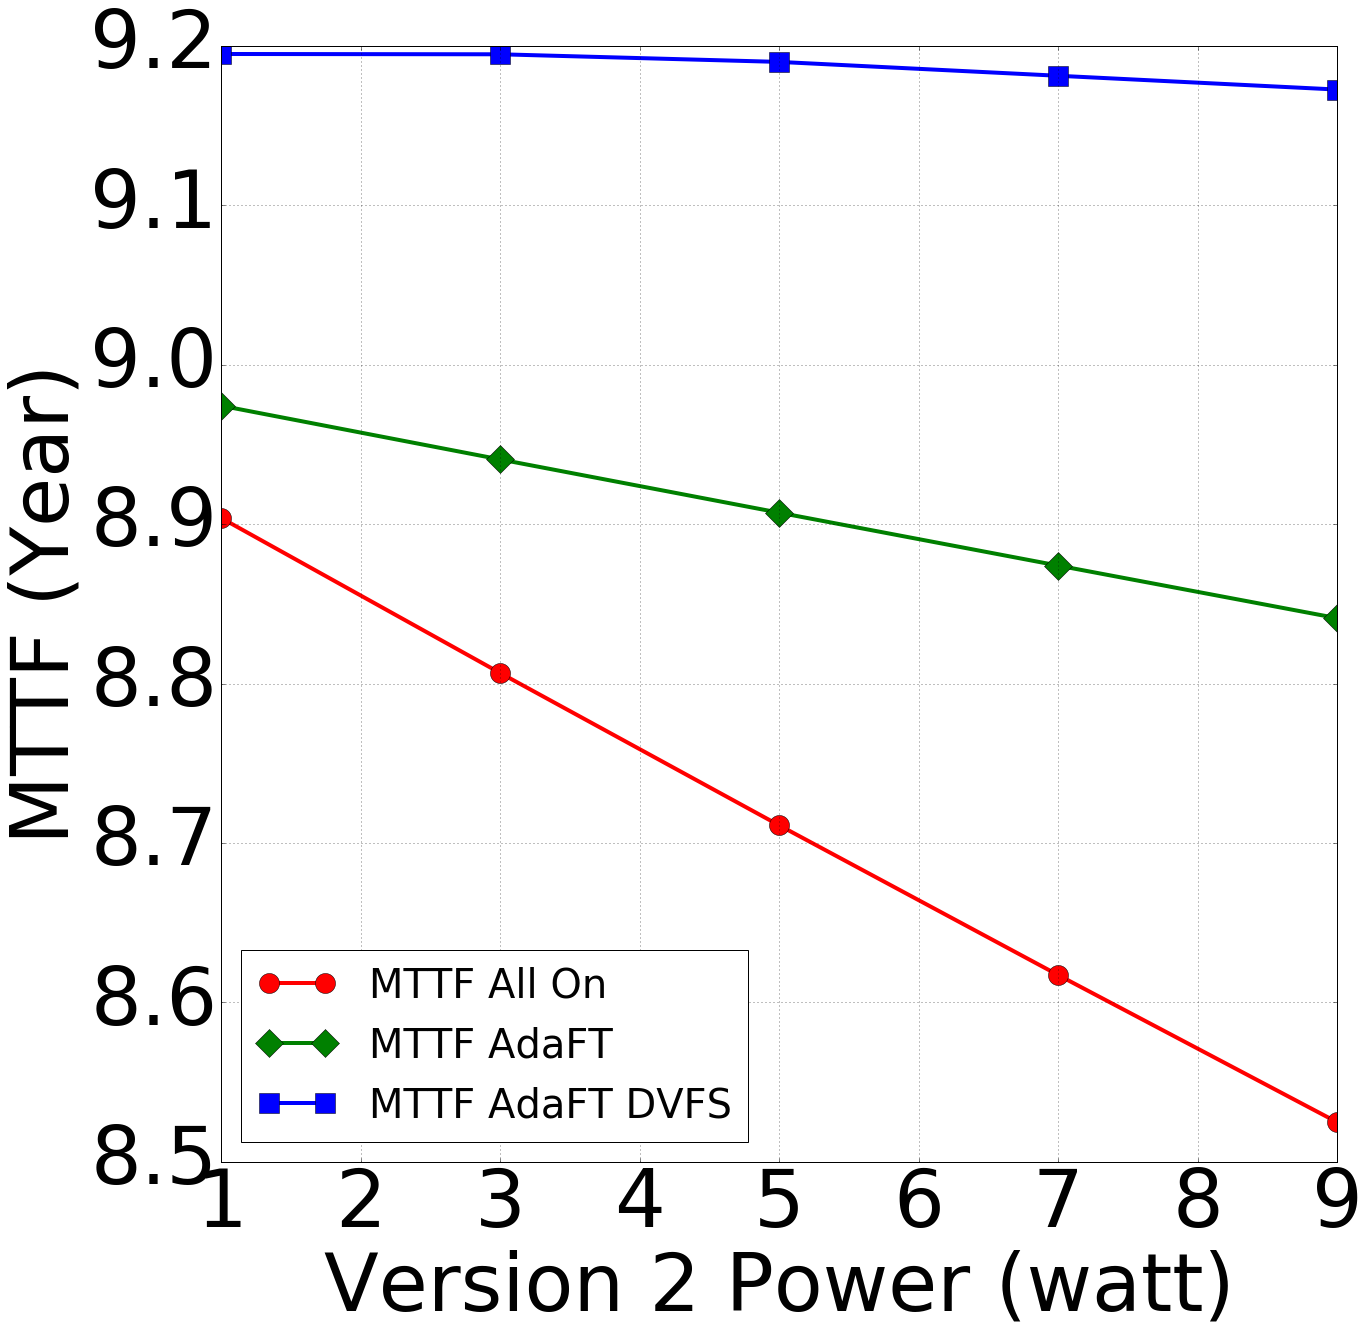

In [17]:
styles = ['-ro', '-gD', '-bs']
linewidths = [4 for i in range(7)]
cols = ['MTTF All On', 'MTTF AdaFT', 'MTTF AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    mttf_power[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Version 2 Power (watt)', fontsize=80)
plt.ylabel('MTTF (Year)', fontsize=80)
# plt.xticks(np.arange(5),mttf_power['Version 2 Power'])
plt.grid(True)
plt.legend(loc='lower left', fontsize=40)

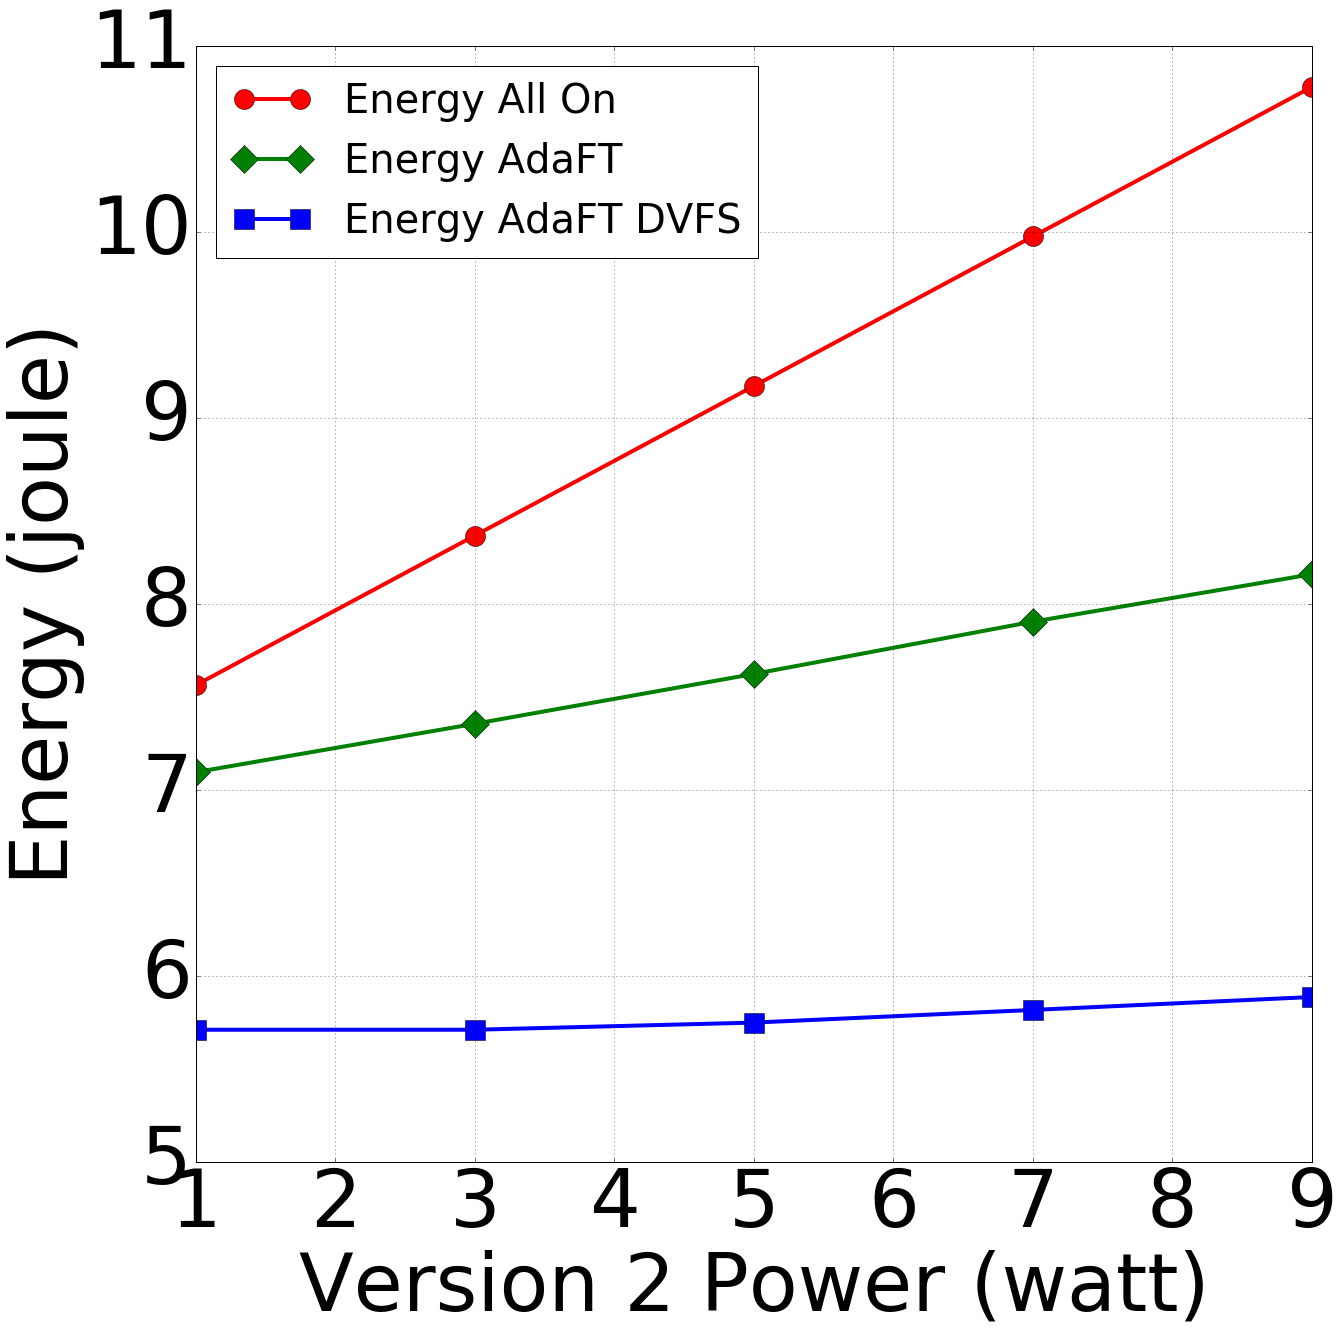

In [38]:
styles = ['-ro', '-gD', '-bs']
linewidths = [4 for i in range(7)]
cols = ['Energy All On', 'Energy AdaFT', 'Energy AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    energy_power[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Version 2 Power (watt)', fontsize=80)
plt.ylabel('Energy (joule)', fontsize=80)
# plt.xticks(np.arange(5),mttf_power['Version 2 Power'])
plt.grid(True)
plt.legend(loc='upper left', fontsize=40)

In [18]:
mttf_processor = mttfs_energy[(mttfs_energy['Version 2 Power'] == 7) & 
                   (mttfs_energy['QoC Constraint'] == 0.15) & 
                   (mttfs_energy['Version 2 Execution Time'] == 0.002) &
                   (mttfs_energy['Version 2 WCET'] == 0.004)]
mttf_processor.set_index(mttf_processor['Number of Processors'], inplace=True)
mttf_processor.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
Number of Processors                                                        
3                       8.873954         9.181202     8.617095   9.144287   
4                       9.055065         9.295298     8.864275   9.267625   
5                       9.168364         9.362287     9.011634   9.340136   
6                       9.242200         9.405900     9.107499   9.386868   

                      Number of Processors  QoC Constraint  \
Number of Processors                                         
3                                        3            0.15   
4                                        4            0.15   
5                                        5            0.15   
6                                        6            0.15   

                      Version 2 Execution Time  Version 2 Power  \
Number of Processors                                              
3                                        0.002              7.0   
4                                        0.002              7.0   
5                                        0.002              7.0   
6                                        0.002              7.0   

                      Version 2 WCET  Energy All On  Energy AdaFT  \
Number of Processors                                                
3                              0.004          9.975         7.904   
4                              0.004          8.100         6.553   
5                              0.004          7.000         5.744   
6                              0.004          6.250         5.202   

                      Energy AdaFT DVFS  Energy DVFS  
Number of Processors                                  
3                                5.8165       6.0910  
4                                4.9825       5.1865  
5                                4.4935       4.6555  
6                                4.1605       4.2955

In [40]:
energy_processor = mttfs_energy[(mttfs_energy['Version 2 Power'] == 7) & 
                   (mttfs_energy['QoC Constraint'] == 0.15) & 
                   (mttfs_energy['Version 2 Execution Time'] == 0.002) &
                   (mttfs_energy['Version 2 WCET'] == 0.004)]
energy_processor.set_index(energy_processor['Number of Processors'], inplace=True)
energy_processor.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
Number of Processors                                                        
3                       8.873954         9.181202     8.617095   9.144287   
4                       9.055065         9.295298     8.864275   9.267625   
5                       9.168364         9.362287     9.011634   9.340136   
6                       9.242200         9.405900     9.107499   9.386868   

                      Number of Processors  QoC Constraint  \
Number of Processors                                         
3                                        3            0.15   
4                                        4            0.15   
5                                        5            0.15   
6                                        6            0.15   

                      Version 2 Execution Time  Version 2 Power  \
Number of Processors                                              
3                                        0.002              7.0   
4                                        0.002              7.0   
5                                        0.002              7.0   
6                                        0.002              7.0   

                      Version 2 WCET  Energy All On  Energy AdaFT  \
Number of Processors                                                
3                              0.004          9.975         7.904   
4                              0.004          8.100         6.553   
5                              0.004          7.000         5.744   
6                              0.004          6.250         5.202   

                      Energy AdaFT DVFS  Energy DVFS  
Number of Processors                                  
3                                5.8165       6.0910  
4                                4.9825       5.1865  
5                                4.4935       4.6555  
6                                4.1605       4.2955

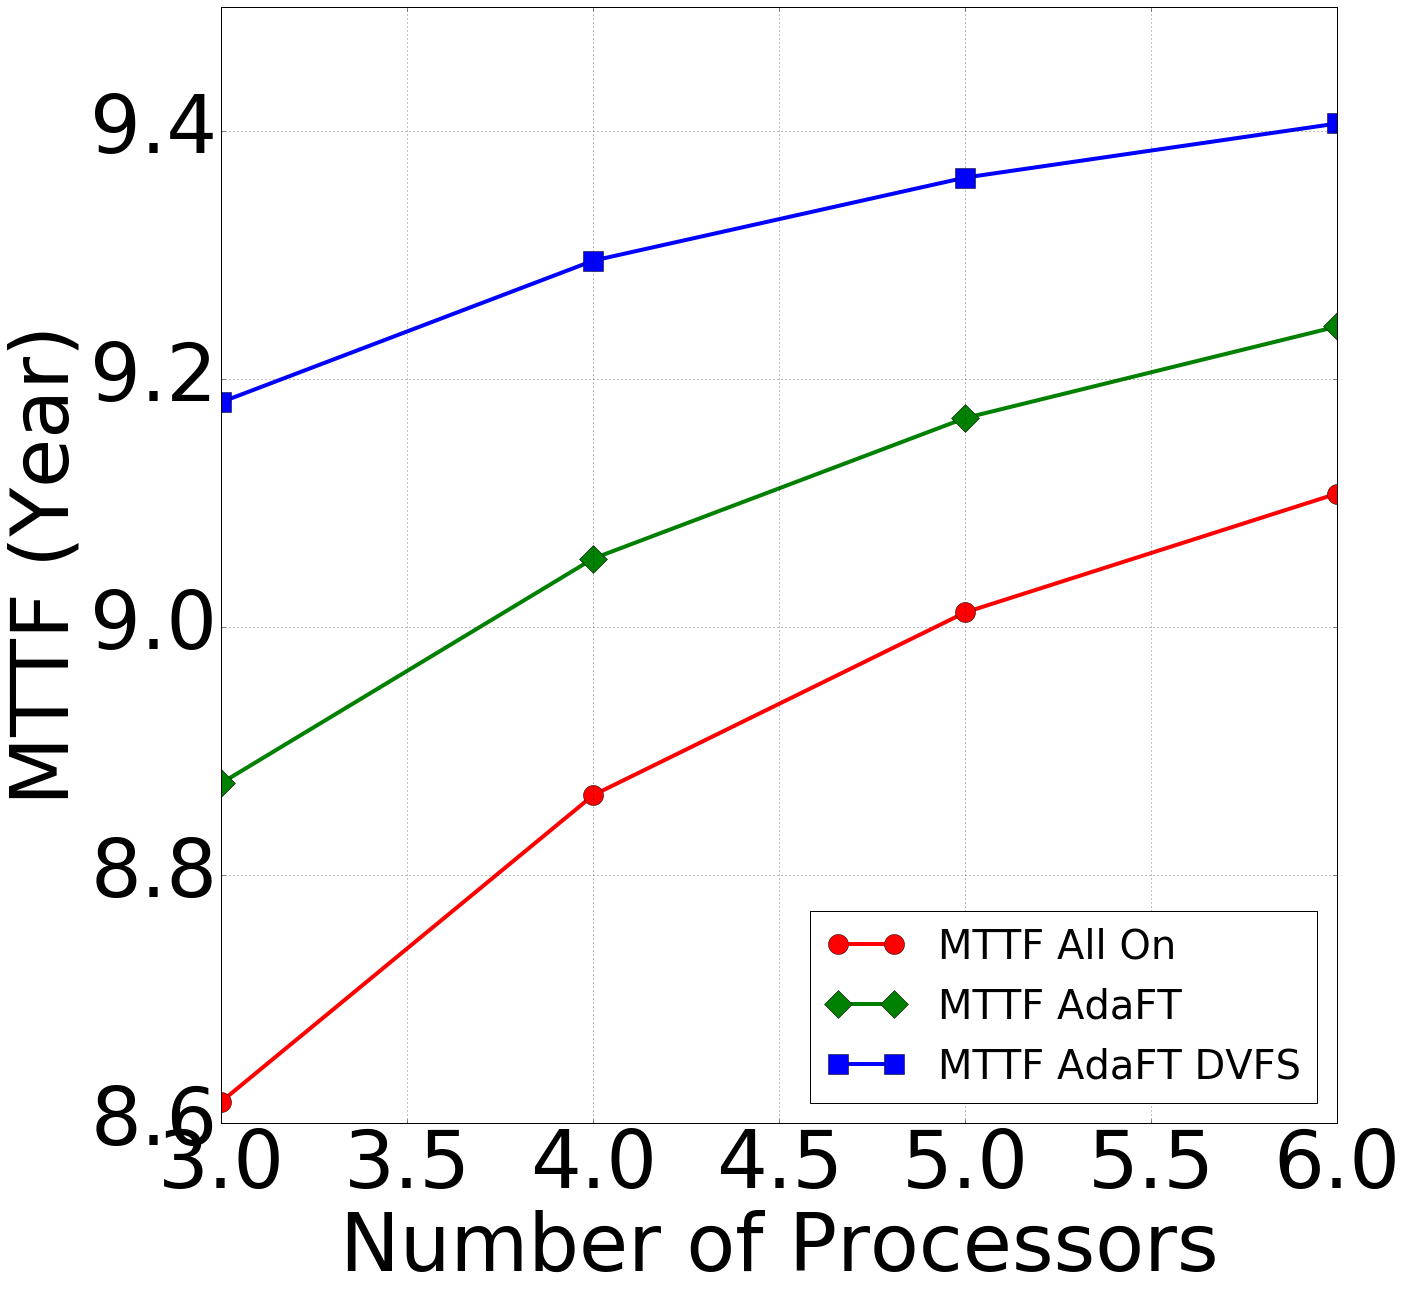

In [19]:
styles = ['-ro', '-gD', '-bs']
linewidths = [4 for i in range(7)]
cols = ['MTTF All On', 'MTTF AdaFT', 'MTTF AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    mttf_processor[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Number of Processors', fontsize=80)
plt.ylabel('MTTF (Year)', fontsize=80)
plt.grid(True)
plt.legend(loc='lower right', fontsize=40)

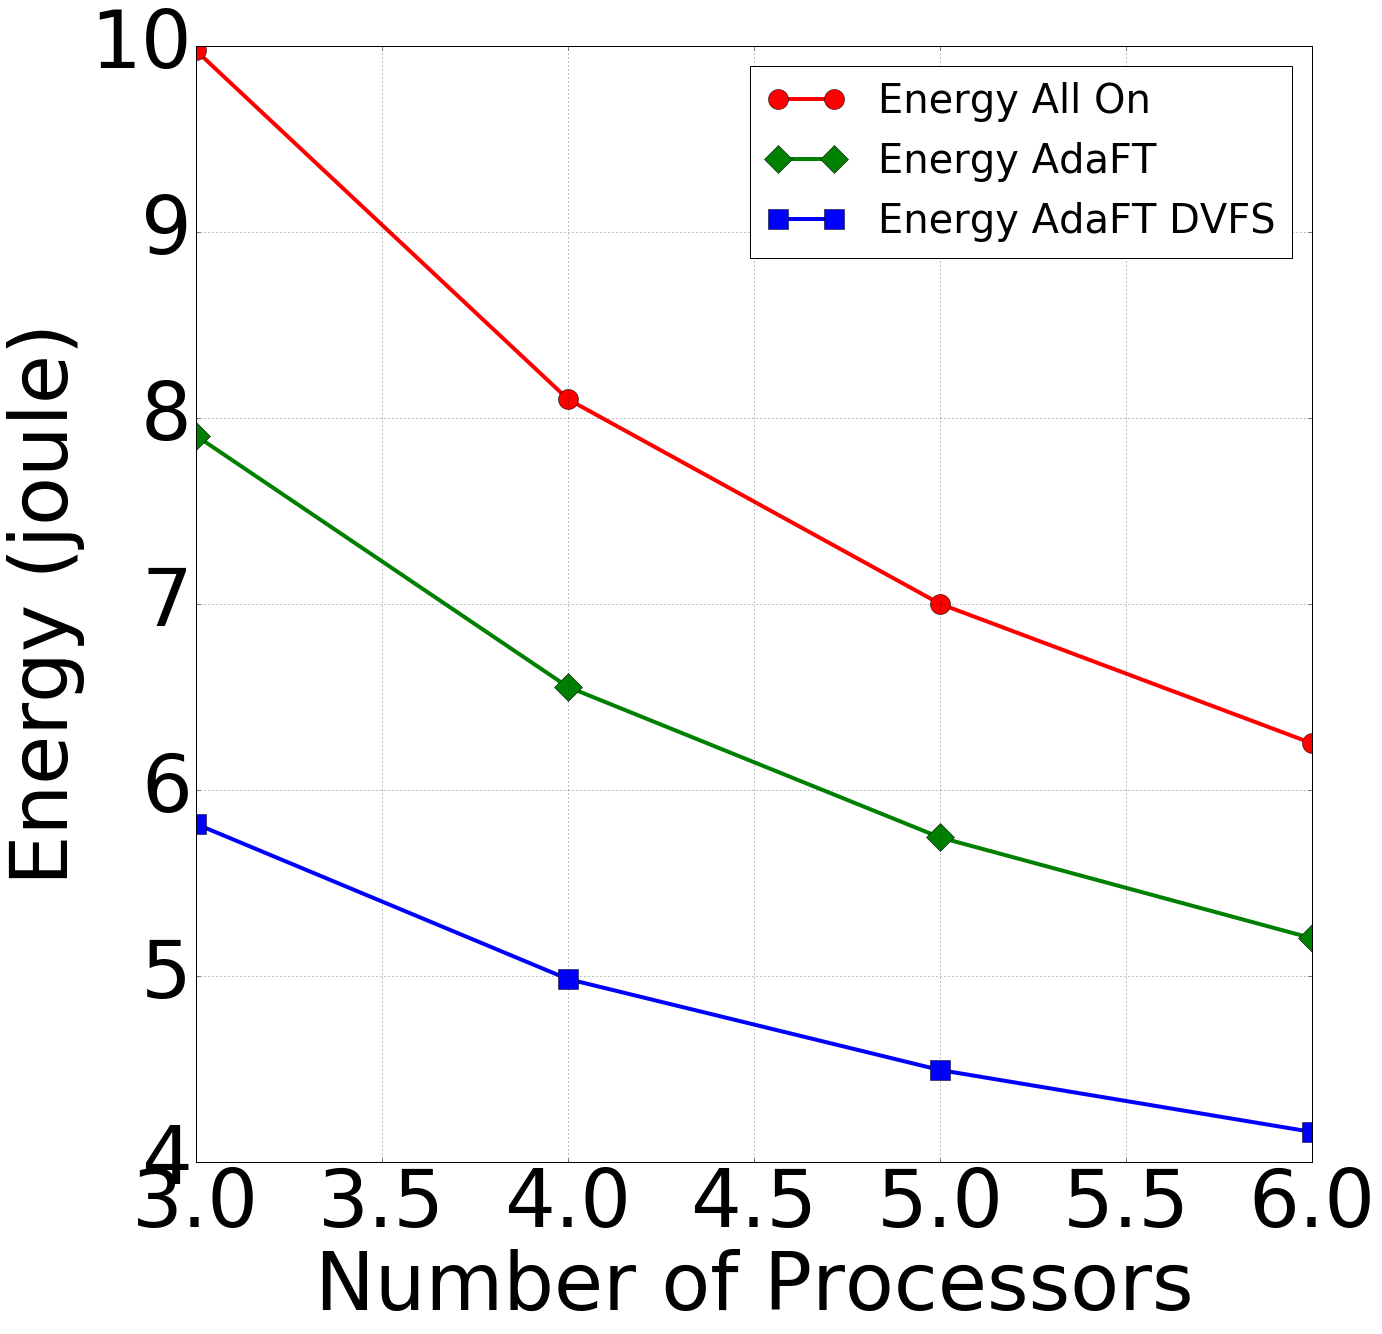

In [43]:
styles = ['-ro', '-gD', '-bs']
linewidths = [4 for i in range(7)]
cols = ['Energy All On', 'Energy AdaFT', 'Energy AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    energy_processor[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Number of Processors', fontsize=80)
plt.ylabel('Energy (joule)', fontsize=80)
plt.grid(True)
plt.legend(loc='upper right', fontsize=40)

In [25]:
mttf_qoc = mttfs_energy[(mttfs_energy['Version 2 Power'] == 7) & 
                   (mttfs_energy['Number of Processors'] == 3) & 
                   (mttfs_energy['Version 2 Execution Time'] == 0.001) &
                   (mttfs_energy['Version 2 WCET'] == 0.005)]
mttf_qoc.set_index(mttf_qoc['QoC Constraint'], inplace=True)
mttf_qoc.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
QoC Constraint                                                        
0.15              8.927904         9.194674     8.770501   9.181935   
0.35              8.994259         9.204833     8.867811   9.200666   
0.55              9.089078         9.218906     8.959576   9.217874   
0.75              9.132145         9.230043     9.016515   9.230043   

                Number of Processors  QoC Constraint  \
QoC Constraint                                         
0.15                               3            0.15   
0.35                               3            0.35   
0.55                               3            0.55   
0.75                               3            0.75   

                Version 2 Execution Time  Version 2 Power  Version 2 WCET  \
QoC Constraint                                                              
0.15                               0.001              7.0           0.005   
0.35                               0.001              7.0           0.005   
0.55                               0.001              7.0           0.005   
0.75                               0.001              7.0           0.005   

                Energy All On  Energy AdaFT  Energy AdaFT DVFS  Energy DVFS  
QoC Constraint                                                               
0.15                   8.6685        7.4555              5.710        5.788  
0.35                   8.0385        7.0450              5.650        5.674  
0.55                   7.4715        6.4520              5.566        5.572  
0.75                   7.1250        6.1890              5.500        5.500

In [44]:
energy_qoc = mttfs_energy[(mttfs_energy['Version 2 Power'] == 7) & 
                   (mttfs_energy['Number of Processors'] == 3) & 
                   (mttfs_energy['Version 2 Execution Time'] == 0.001) &
                   (mttfs_energy['Version 2 WCET'] == 0.005)]
energy_qoc.set_index(energy_qoc['QoC Constraint'], inplace=True)
energy_qoc.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
QoC Constraint                                                        
0.15              8.927904         9.194674     8.770501   9.181935   
0.35              8.994259         9.204833     8.867811   9.200666   
0.55              9.089078         9.218906     8.959576   9.217874   
0.75              9.132145         9.230043     9.016515   9.230043   

                Number of Processors  QoC Constraint  \
QoC Constraint                                         
0.15                               3            0.15   
0.35                               3            0.35   
0.55                               3            0.55   
0.75                               3            0.75   

                Version 2 Execution Time  Version 2 Power  Version 2 WCET  \
QoC Constraint                                                              
0.15                               0.001              7.0           0.005   
0.35                               0.001              7.0           0.005   
0.55                               0.001              7.0           0.005   
0.75                               0.001              7.0           0.005   

                Energy All On  Energy AdaFT  Energy AdaFT DVFS  Energy DVFS  
QoC Constraint                                                               
0.15                   8.6685        7.4555              5.710        5.788  
0.35                   8.0385        7.0450              5.650        5.674  
0.55                   7.4715        6.4520              5.566        5.572  
0.75                   7.1250        6.1890              5.500        5.500

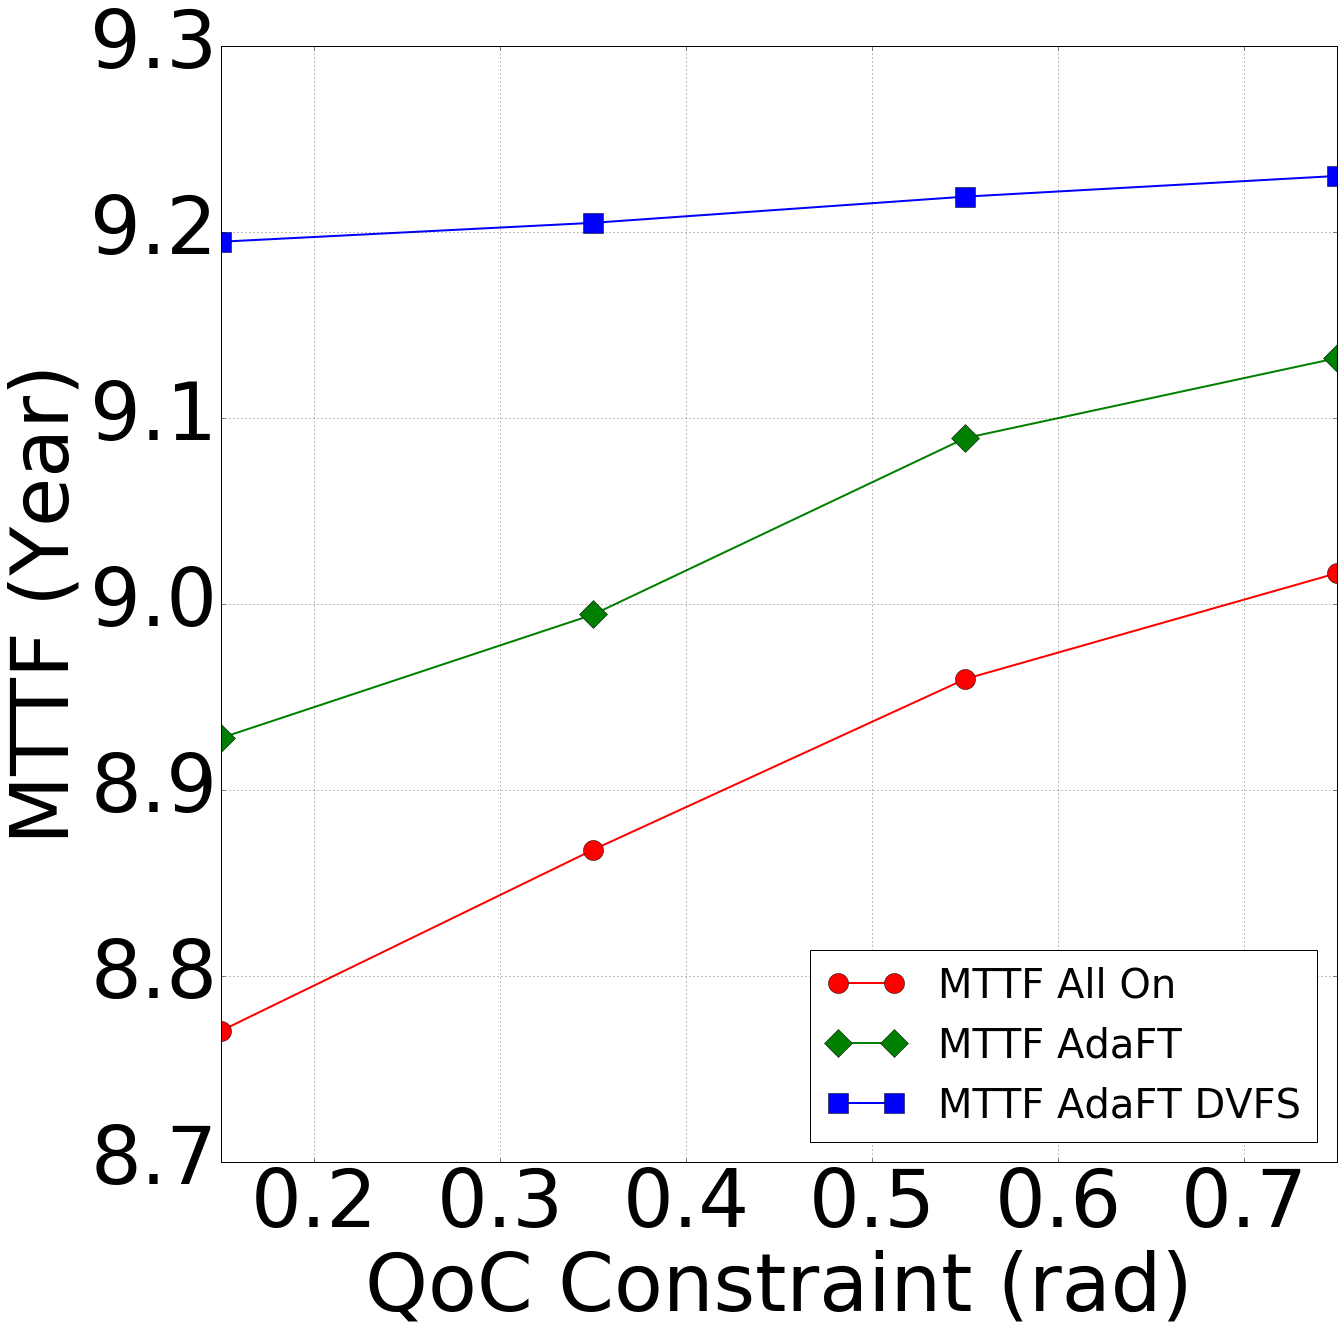

In [26]:
styles = ['-ro', '-gD', '-bs']
linewidths = [2 for i in range(7)]
cols = ['MTTF All On', 'MTTF AdaFT', 'MTTF AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    mttf_qoc[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('QoC Constraint (rad)', fontsize=80)
plt.ylabel('MTTF (Year)', fontsize=80)
plt.grid(True)
plt.legend(loc='lower right', fontsize=40)

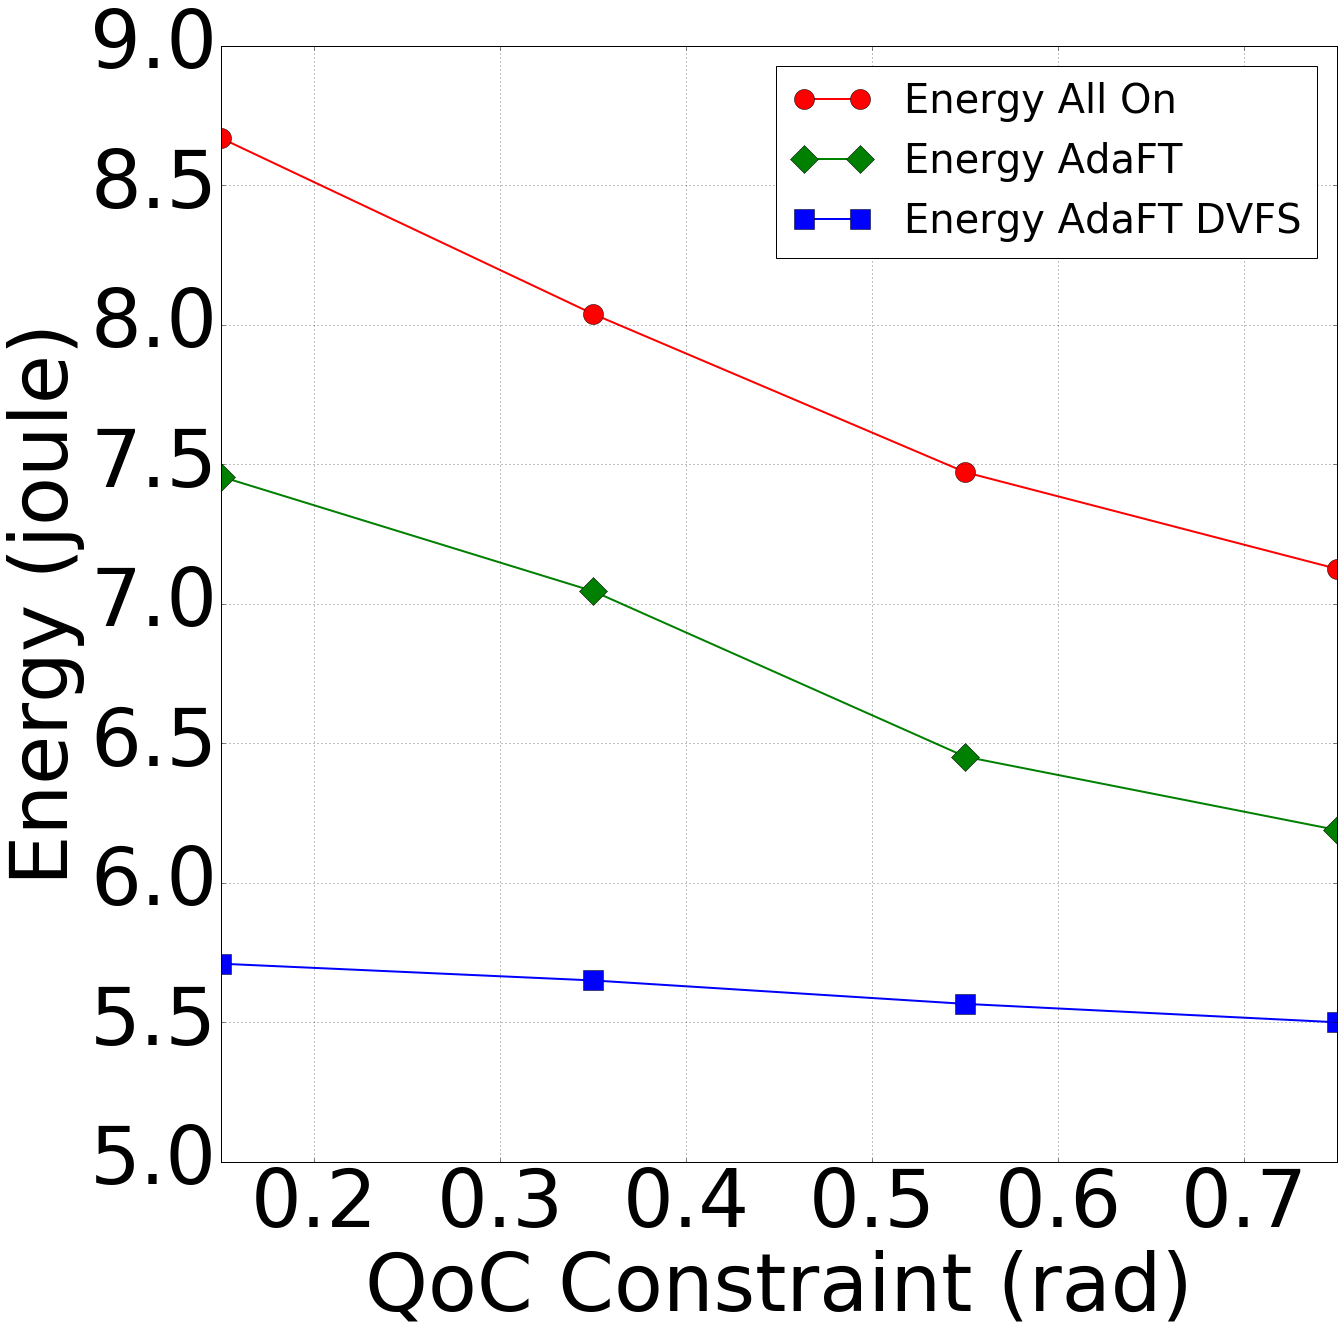

In [59]:
styles = ['-ro', '-gD', '-bs']
linewidths = [2 for i in range(7)]
cols = ['Energy All On', 'Energy AdaFT', 'Energy AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    energy_qoc[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('QoC Constraint (rad)', fontsize=80)
plt.ylabel('Energy (joule)', fontsize=80)
plt.grid(True)
plt.legend(loc='upper right', fontsize=40)

In [27]:
mttf_et = mttfs_energy[(mttfs_energy['Version 2 Power'] == 7) & 
                   (mttfs_energy['Number of Processors'] == 3) & 
                   (mttfs_energy['QoC Constraint'] == 0.15) &
                   (mttfs_energy['Version 2 WCET'] == 0.005)]
mttf_et.set_index(mttf_et['Version 2 Execution Time'] * 1000, inplace=True)
mttf_et.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
Version 2 Execution Time                                                        
1.0                         8.927904         9.194674     8.770501   9.181935   
2.0                         8.873954         9.194674     8.617095   9.181935   
3.0                         8.818710         9.150513     8.467965   9.055931   
4.0                         8.765453         9.062441     8.322975   8.806371   
5.0                         8.712849         8.919229     8.181992   8.418354   

                          Number of Processors  QoC Constraint  \
Version 2 Execution Time                                         
1.0                                          3            0.15   
2.0                                          3            0.15   
3.0                                          3            0.15   
4.0                                          3            0.15   
5.0                                          3            0.15   

                          Version 2 Execution Time  Version 2 Power  \
Version 2 Execution Time                                              
1.0                                          0.001              7.0   
2.0                                          0.002              7.0   
3.0                                          0.003              7.0   
4.0                                          0.004              7.0   
5.0                                          0.005              7.0   

                          Version 2 WCET  Energy All On  Energy AdaFT  \
Version 2 Execution Time                                                
1.0                                0.005         8.6685        7.4555   
2.0                                0.005         9.9750        7.9040   
3.0                                0.005        11.2815        8.3460   
4.0                                0.005        12.5880        8.7880   
5.0                                0.005        13.8945        9.2300   

                          Energy AdaFT DVFS  Energy DVFS  
Version 2 Execution Time                                  
1.0                                 5.71000      5.78800  
2.0                                 5.71000      5.78800  
3.0                                 6.06008      6.81012  
4.0                                 6.76456      8.90284  
5.0                                 7.92600     12.35300

In [48]:
energy_et = mttfs_energy[(mttfs_energy['Version 2 Power'] == 7) & 
                   (mttfs_energy['Number of Processors'] == 3) & 
                   (mttfs_energy['QoC Constraint'] == 0.15) &
                   (mttfs_energy['Version 2 WCET'] == 0.005)]
energy_et.set_index(energy_et['Version 2 Execution Time'] * 1000, inplace=True)
energy_et.head()

MTTF AdaFT  MTTF AdaFT DVFS  MTTF All On  MTTF DVFS  \
Version 2 Execution Time                                                        
1.0                         8.927904         9.194674     8.770501   9.181935   
2.0                         8.873954         9.194674     8.617095   9.181935   
3.0                         8.818710         9.150513     8.467965   9.055931   
4.0                         8.765453         9.062441     8.322975   8.806371   
5.0                         8.712849         8.919229     8.181992   8.418354   

                          Number of Processors  QoC Constraint  \
Version 2 Execution Time                                         
1.0                                          3            0.15   
2.0                                          3            0.15   
3.0                                          3            0.15   
4.0                                          3            0.15   
5.0                                          3            0.15   

                          Version 2 Execution Time  Version 2 Power  \
Version 2 Execution Time                                              
1.0                                          0.001              7.0   
2.0                                          0.002              7.0   
3.0                                          0.003              7.0   
4.0                                          0.004              7.0   
5.0                                          0.005              7.0   

                          Version 2 WCET  Energy All On  Energy AdaFT  \
Version 2 Execution Time                                                
1.0                                0.005         8.6685        7.4555   
2.0                                0.005         9.9750        7.9040   
3.0                                0.005        11.2815        8.3460   
4.0                                0.005        12.5880        8.7880   
5.0                                0.005        13.8945        9.2300   

                          Energy AdaFT DVFS  Energy DVFS  
Version 2 Execution Time                                  
1.0                                 5.71000      5.78800  
2.0                                 5.71000      5.78800  
3.0                                 6.06008      6.81012  
4.0                                 6.76456      8.90284  
5.0                                 7.92600     12.35300

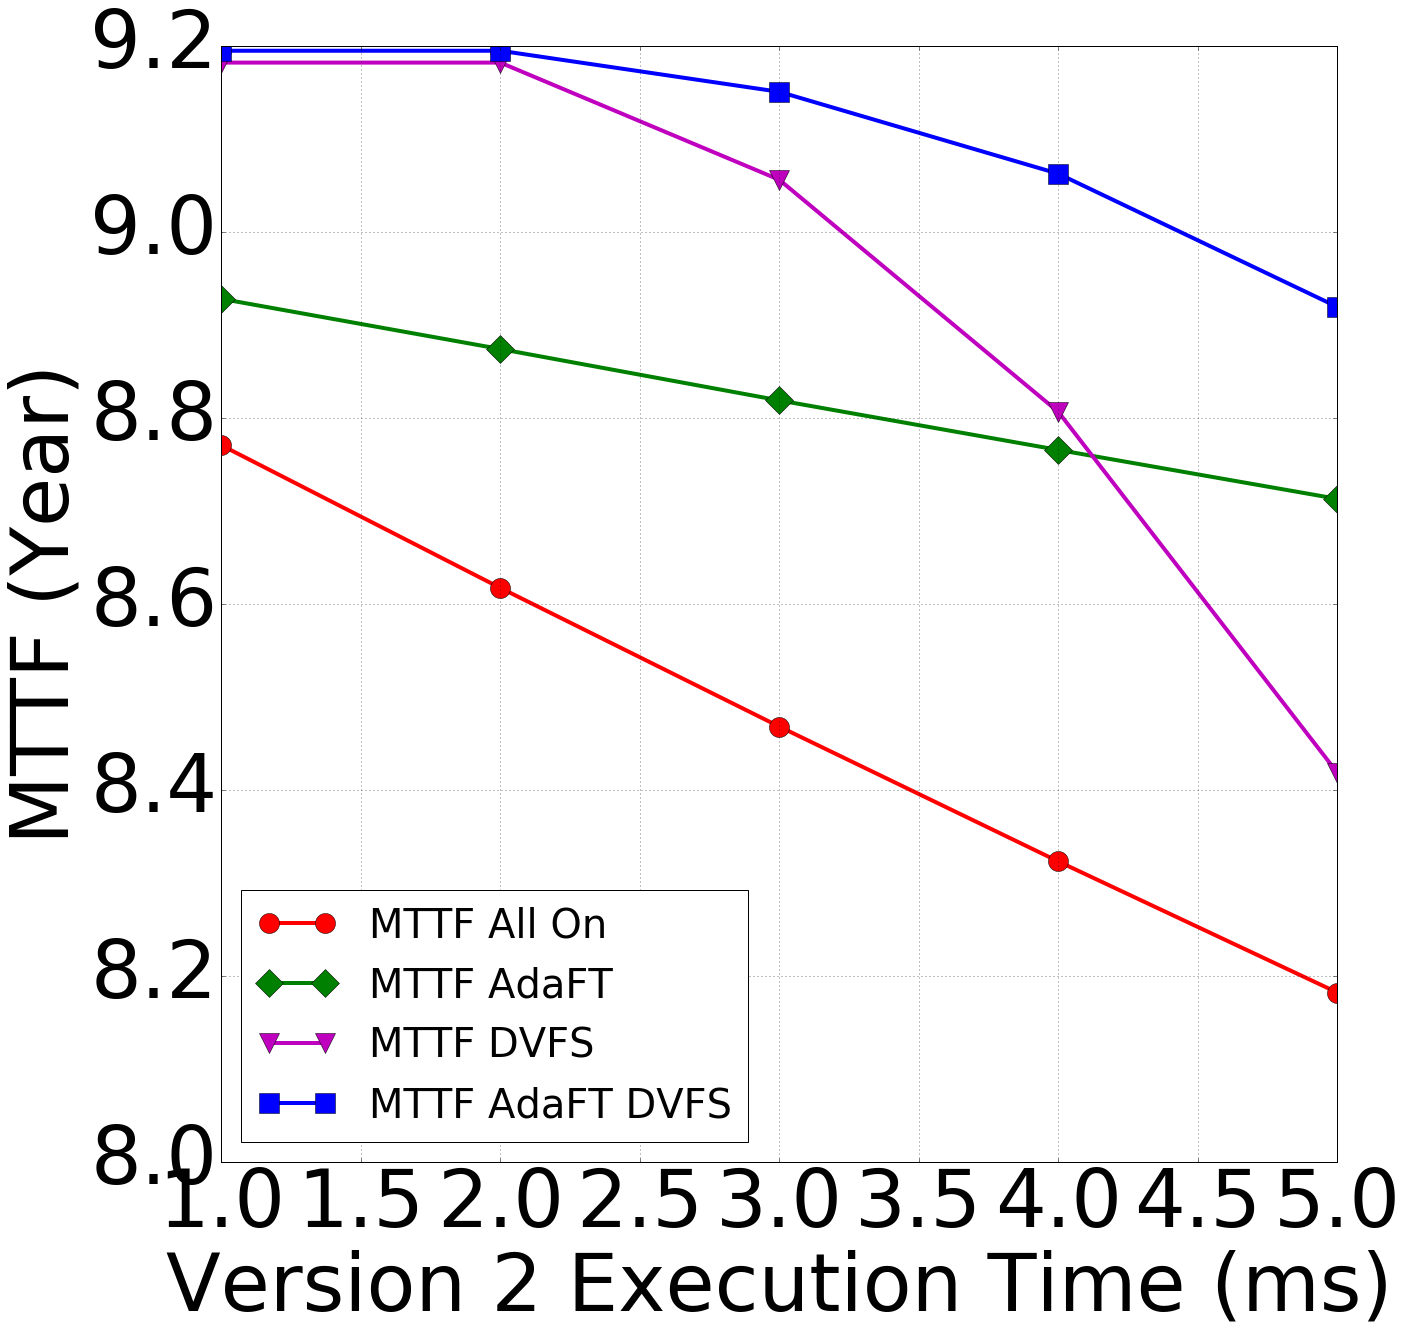

In [28]:
styles = ['-ro', '-gD', '-mv', '-bs']
linewidths = [4 for i in range(7)]
cols = ['MTTF All On', 'MTTF AdaFT', 'MTTF DVFS', 'MTTF AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    mttf_et[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Version 2 Execution Time (ms)', fontsize=80)
plt.ylabel('MTTF (Year)', fontsize=80)
plt.grid(True)
plt.legend(loc='lower left',  fontsize=40)

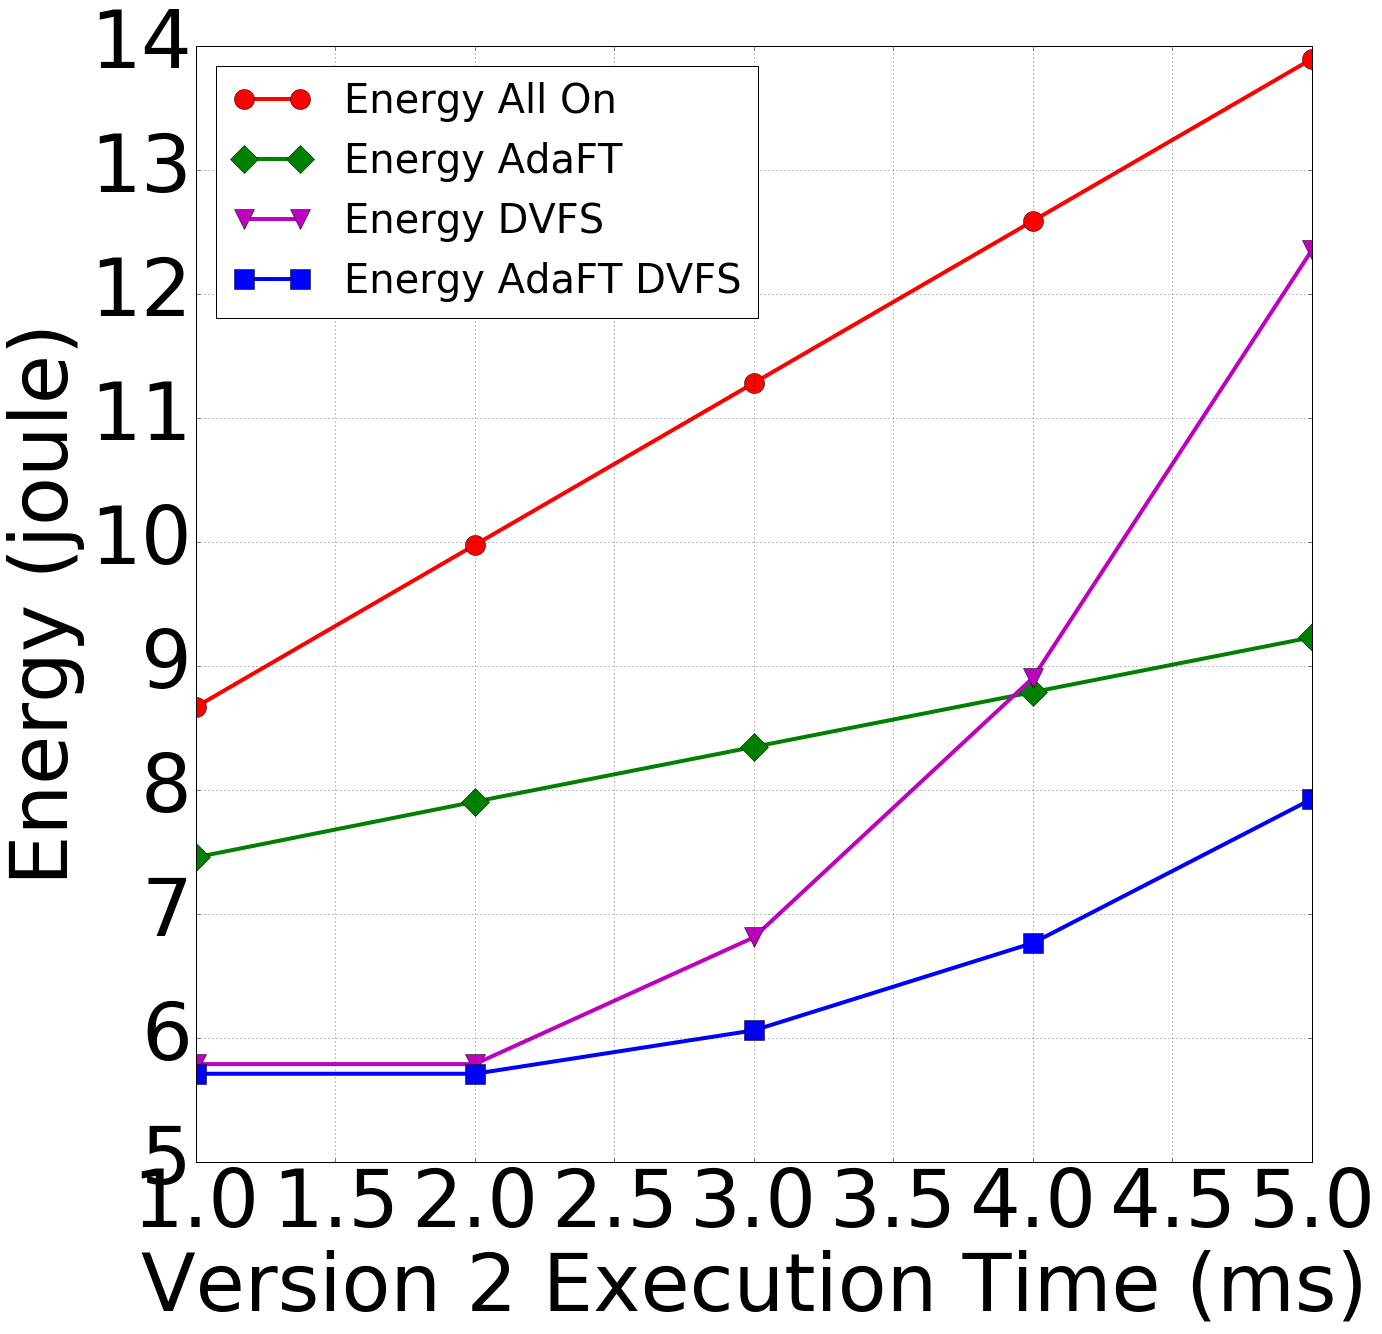

In [51]:
styles = ['-ro', '-gD', '-mv', '-bs']
linewidths = [4 for i in range(7)]
cols = ['Energy All On', 'Energy AdaFT', 'Energy DVFS', 'Energy AdaFT DVFS']
for col, style, lw in zip(cols, styles, linewidths):
    energy_et[col].plot(style=style, lw=lw, figsize=(20, 20), fontsize=80, markersize=20)
# taaf.plot(style=styles, lw=linewidths,  figsize=(12, 6), fontsize=20)
plt.xlabel('Version 2 Execution Time (ms)', fontsize=80)
plt.ylabel('Energy (joule)', fontsize=80)
plt.grid(True)
plt.legend(loc='upper left',  fontsize=40)

In [53]:
train_cols = [u'Number of Processors', u'QoC Constraint',
               u'Version 2 Execution Time', u'Version 2 Power', u'Version 2 WCET']

X = mttfs_energy[train_cols]
all_on = mttfs_energy['MTTF All On']
ada = mttfs_energy['MTTF AdaFT']
dvfs = mttfs_energy['MTTF DVFS']
ada_dvfs = mttfs_energy['MTTF AdaFT DVFS']
energy_all_on = mttfs_energy['Energy All On']
energy_ada = mttfs_energy['Energy AdaFT']
energy_dvfs = mttfs_energy['Energy DVFS']
energy_ada_dvfs = mttfs_energy['Energy AdaFT DVFS']

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, all_on)
print(rf.score(X, all_on))
for name, val in zip(train_cols, rf.feature_importances_):
    print(name, val)

0.999563506249
Number of Processors 0.37475946557
QoC Constraint 0.0626698745599
Version 2 Execution Time 0.265024169556
Version 2 Power 0.297395376832
Version 2 WCET 0.000151113481989


In [32]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, ada)
print(rf.score(X, ada))
for name, val in zip(train_cols, rf.feature_importances_):
    print(name, val)

0.999496086742
Number of Processors 0.598669807196
QoC Constraint 0.12150577077
Version 2 Execution Time 0.134419030656
Version 2 Power 0.145138506583
Version 2 WCET 0.000266884794545


In [33]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, dvfs)
print(rf.score(X, dvfs))
for name, val in zip(train_cols, rf.feature_importances_):
    print(name, val)

0.998045074952
Number of Processors 0.278229961497
QoC Constraint 0.00925740163304
Version 2 Execution Time 0.357101541635
Version 2 Power 0.269068273252
Version 2 WCET 0.0863428219833


In [34]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, ada_dvfs)
print(rf.score(X, ada_dvfs))
for name, val in zip(train_cols, rf.feature_importances_):
    print(name, val)

0.997030776059
Number of Processors 0.56316959558
QoC Constraint 0.0195153547825
Version 2 Execution Time 0.208050928631
Version 2 Power 0.160901966541
Version 2 WCET 0.0483621544652


In [54]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, energy_ada_dvfs)
print(rf.score(X, energy_ada_dvfs))
for name, val in zip(train_cols, rf.feature_importances_):
    print(name, val)

0.997986427813
Number of Processors 0.57718353782
QoC Constraint 0.0151096291239
Version 2 Execution Time 0.201461032379
Version 2 Power 0.159808678002
Version 2 WCET 0.0464371226754


In [56]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, energy_ada)
print(rf.score(X, energy_ada))
for name, val in zip(train_cols, rf.feature_importances_):
    print(name, val)

0.999631498603
Number of Processors 0.626703610848
QoC Constraint 0.086172373093
Version 2 Execution Time 0.133815700563
Version 2 Power 0.153036035137
Version 2 WCET 0.000272280358119


In [57]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, energy_dvfs)
print(rf.score(X, energy_dvfs))
for name, val in zip(train_cols, rf.feature_importances_):
    print(name, val)

0.998854321255
Number of Processors 0.269018252707
QoC Constraint 0.00538681396221
Version 2 Execution Time 0.364463807835
Version 2 Power 0.27249356952
Version 2 WCET 0.088637555976


In [58]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X, energy_all_on)
print(rf.score(X, energy_all_on))
for name, val in zip(train_cols, rf.feature_importances_):
    print(name, val)

0.999736362066
Number of Processors 0.355759062544
QoC Constraint 0.0384477349416
Version 2 Execution Time 0.289621378932
Version 2 Power 0.31600148805
Version 2 WCET 0.000170335532194


        u1 ada     u2 ada     u3 ada     u1 all     u2 all     u3 all  \
745  88.880104  17.575969  24.876484  88.904233  17.556101  24.873130   
746  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
747  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
748  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
749  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
750  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
751  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
752  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
753  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
754  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
755  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
756  88.880104  17.575969  24.876484  84.211191  16.583384  23.579751   
757  88.880104  17.575969  24.876484  84.211191  16

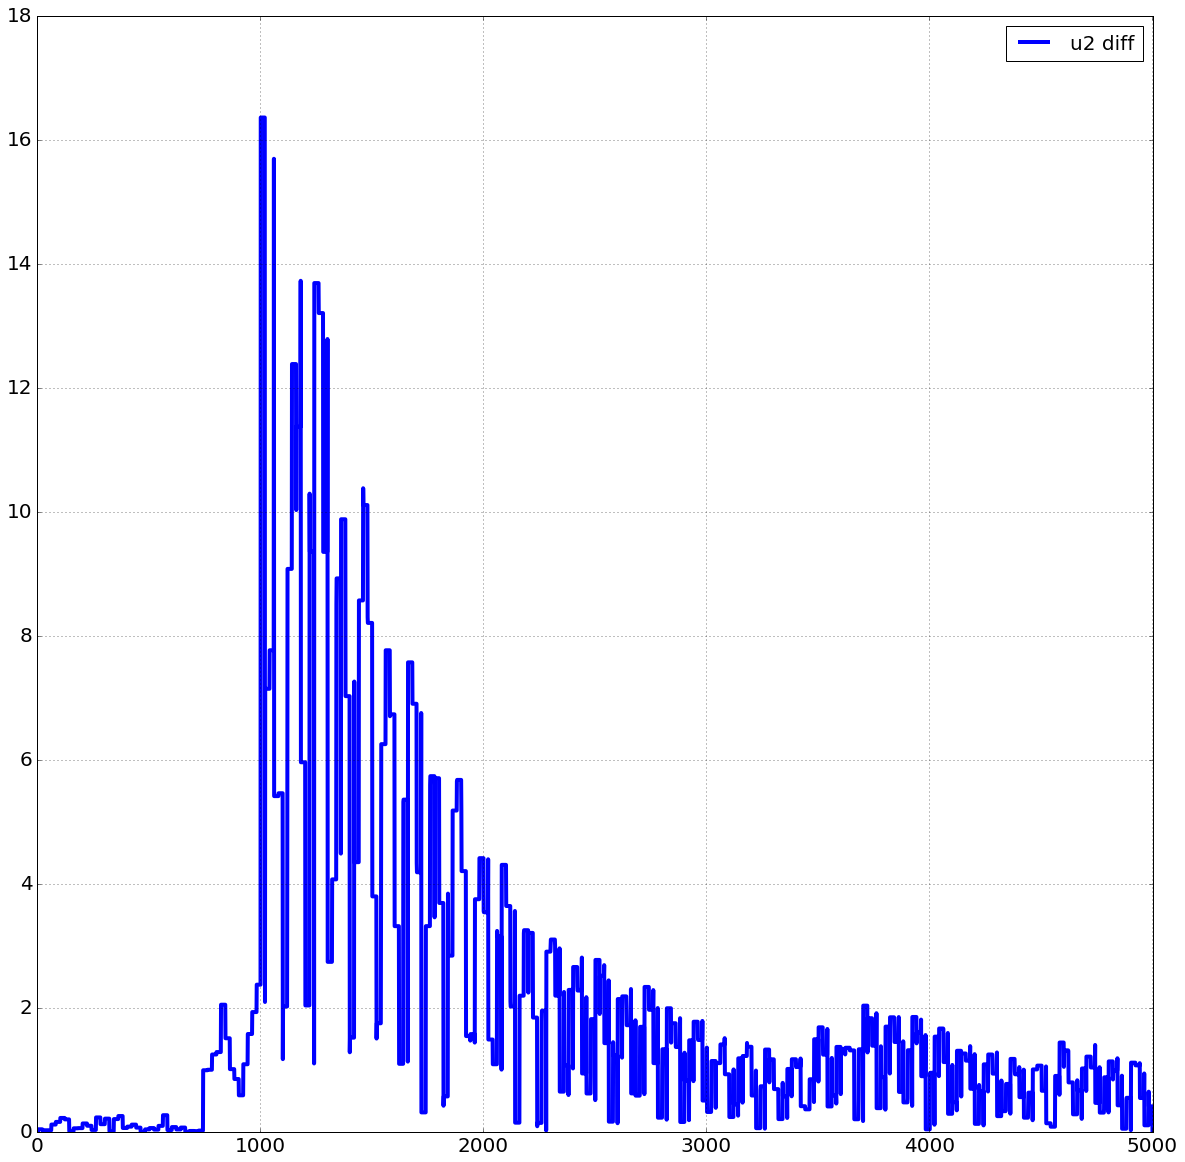

In [55]:
u_ada = pd.read_csv('u_ada.csv')
u_all_on = pd.read_csv('u_all_on.csv')
u = pd.concat((u_ada, u_all_on), axis=0)
u.index = ['u1 ada', 'u2 ada', 'u3 ada', 'u1 all', 'u2 all', 'u3 all']
columns = u.columns[1:]
u = u[columns]
u = u.T
u['u1 diff'] = abs(u['u1 ada'] - u['u1 all'])
u['u2 diff'] = abs(u['u2 ada'] - u['u2 all'])
u['u3 diff'] = abs(u['u3 ada'] - u['u3 all'])

print(u.ix[745 : 780, :])
u.plot(fontsize=20, figsize=(20, 20), lw = 4, grid=True, y=['u2 diff'])
plt.legend(fontsize = 20)